In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [ ]:
def sigmoid(x):
    return (np.divide(1, 1+np.exp(-x)))
def tang(A, alpha, x):
    return (A*np.divide(1 - np.exp(-alpha*x), 1 + np.exp(-alpha*x)))
def minmaxscale(x):
    return(np.divide(x - np.mean(x), np.std(x)))

In [3]:
def steps_amplitude(BOUND, data, steps, rubbish):
    a = 35
    b = 65
    c = 0
    for i in range(5):
        fig1 = plt.figure(figsize= (30,10))
        axes = fig1.add_axes([0.2,0.1,1,1])
        axes.plot(data[10000*i:10000*(i+1)])
        j = 35 + i*10000
        while(j <(i+1)*10000 - 100):
            temp = np.array(data[j:j+100])
            if(max(abs(temp)) > BOUND[i]):
                r = np.argmax(abs(temp))
                x = np.array(data[j+r-a:j+r+b])
                y = np.array(data[j+r+b + 5:j+r+b + 105])
                axes.plot(range(j+r-a,j+r+b),data[j+r-a:j+r+b], c='r')
                axes.plot(range(j+r+b + 5,j+r+b + 105),data[j+r+b + 5:j+r+b + 105], c='g')
                
                steps.append(np.array(x))
                rubbish.append(np.array(y))
                j = j + r + 100
                
            j = j + 1
    return steps, rubbish
def drow( data):
    fig1 = plt.figure(figsize= (30,10))
    axes = fig1.add_axes([0.2,0.1,1,1])
    axes.plot( range(100), data[:100])
    axes.plot( range(100), data[100:200])
    axes.plot( range(100), data[200:])

In [39]:
Data = []
Data_filtered = []
for i in range(2,6):
    data = pd.read_csv(f'F:\\datastep\\{i}_100s.csv', sep=';', header = None) 
    data.columns = ["X", "Y", "Y1", "Z"]
    data = data[['X', 'Y', 'Z']]
    data = data[:60000]
    Data.append(data)
Data_proc = Data

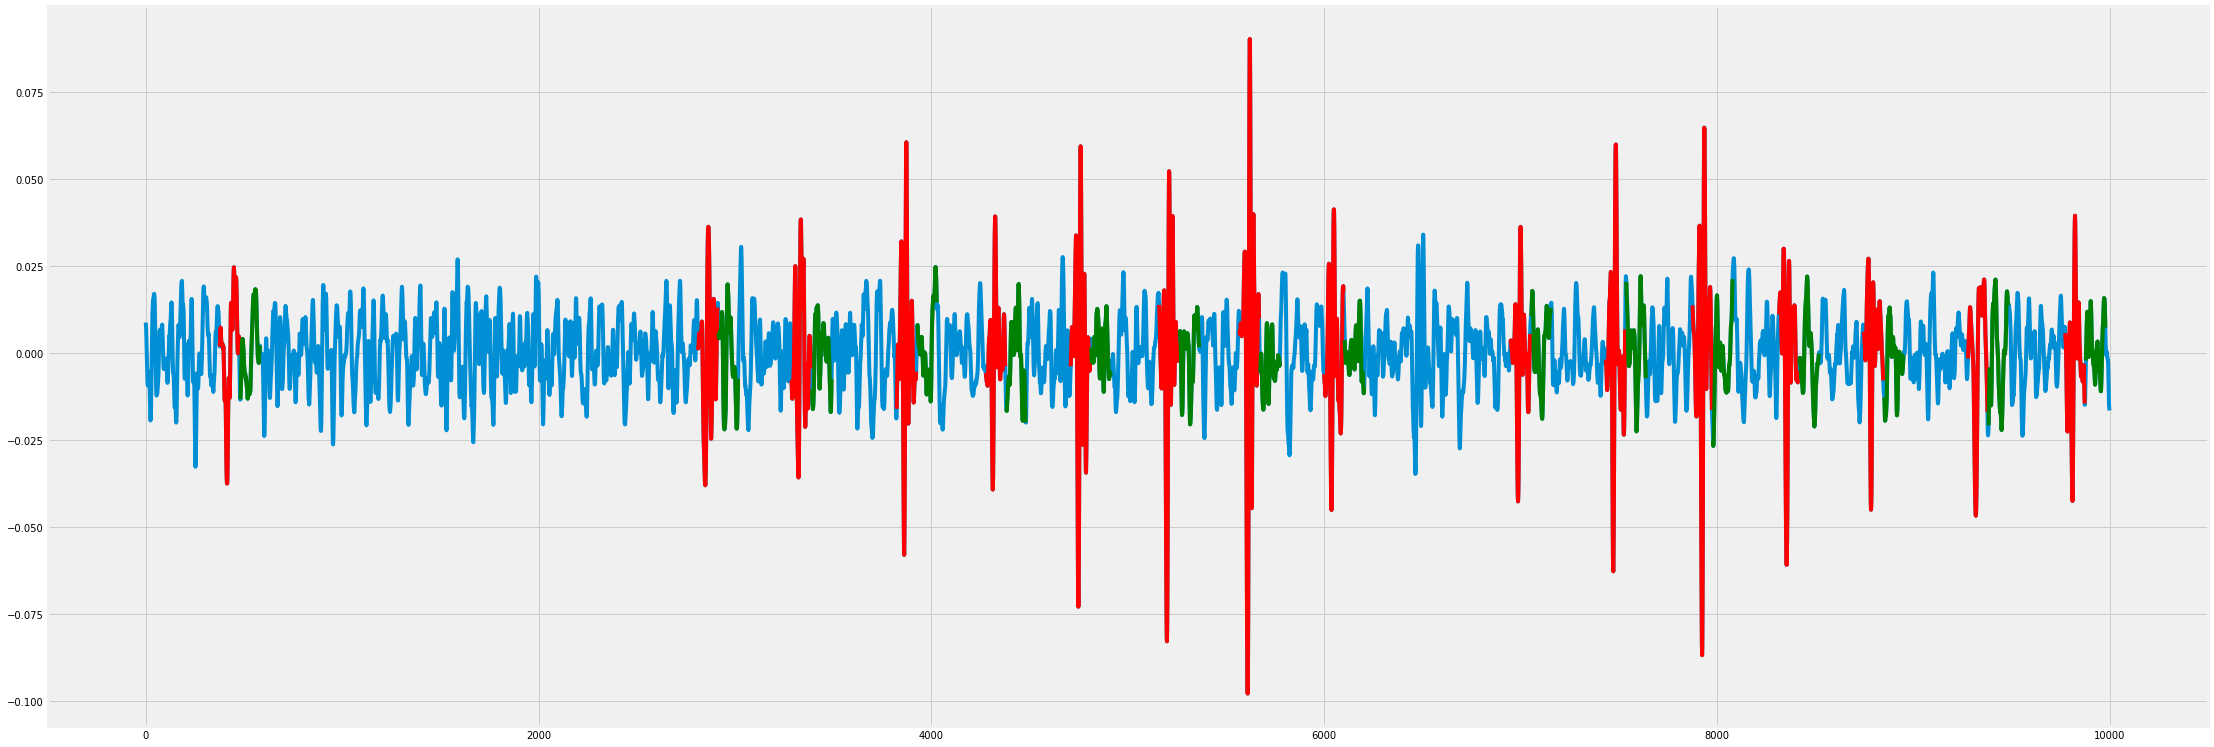

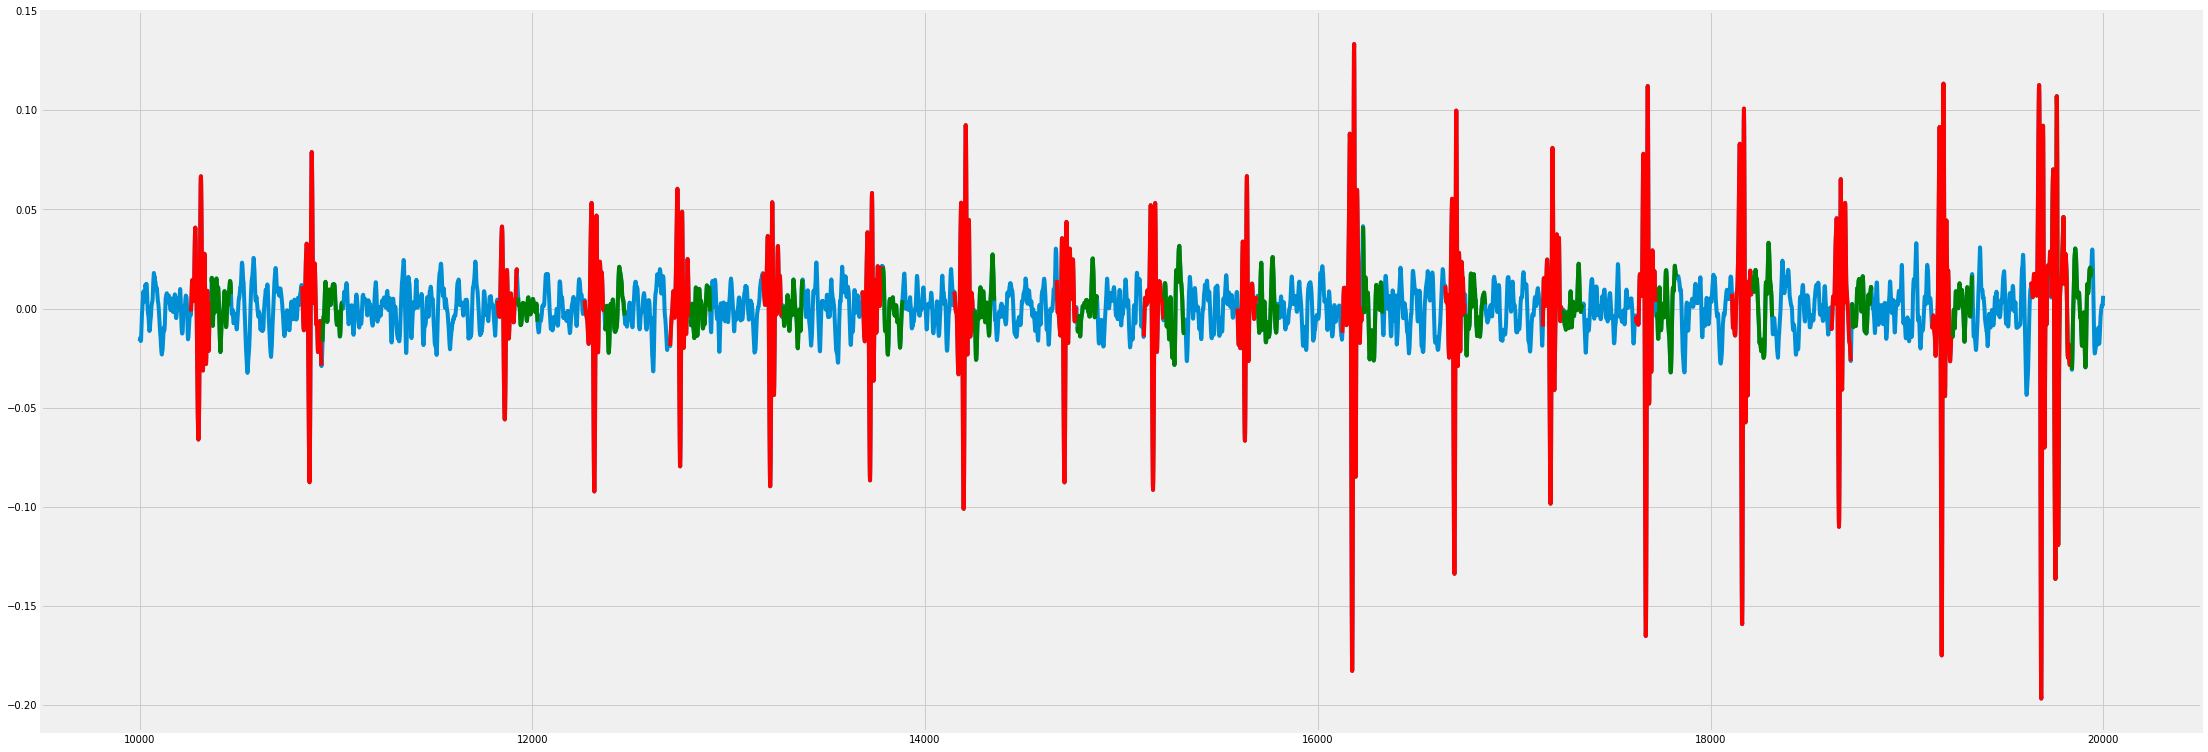

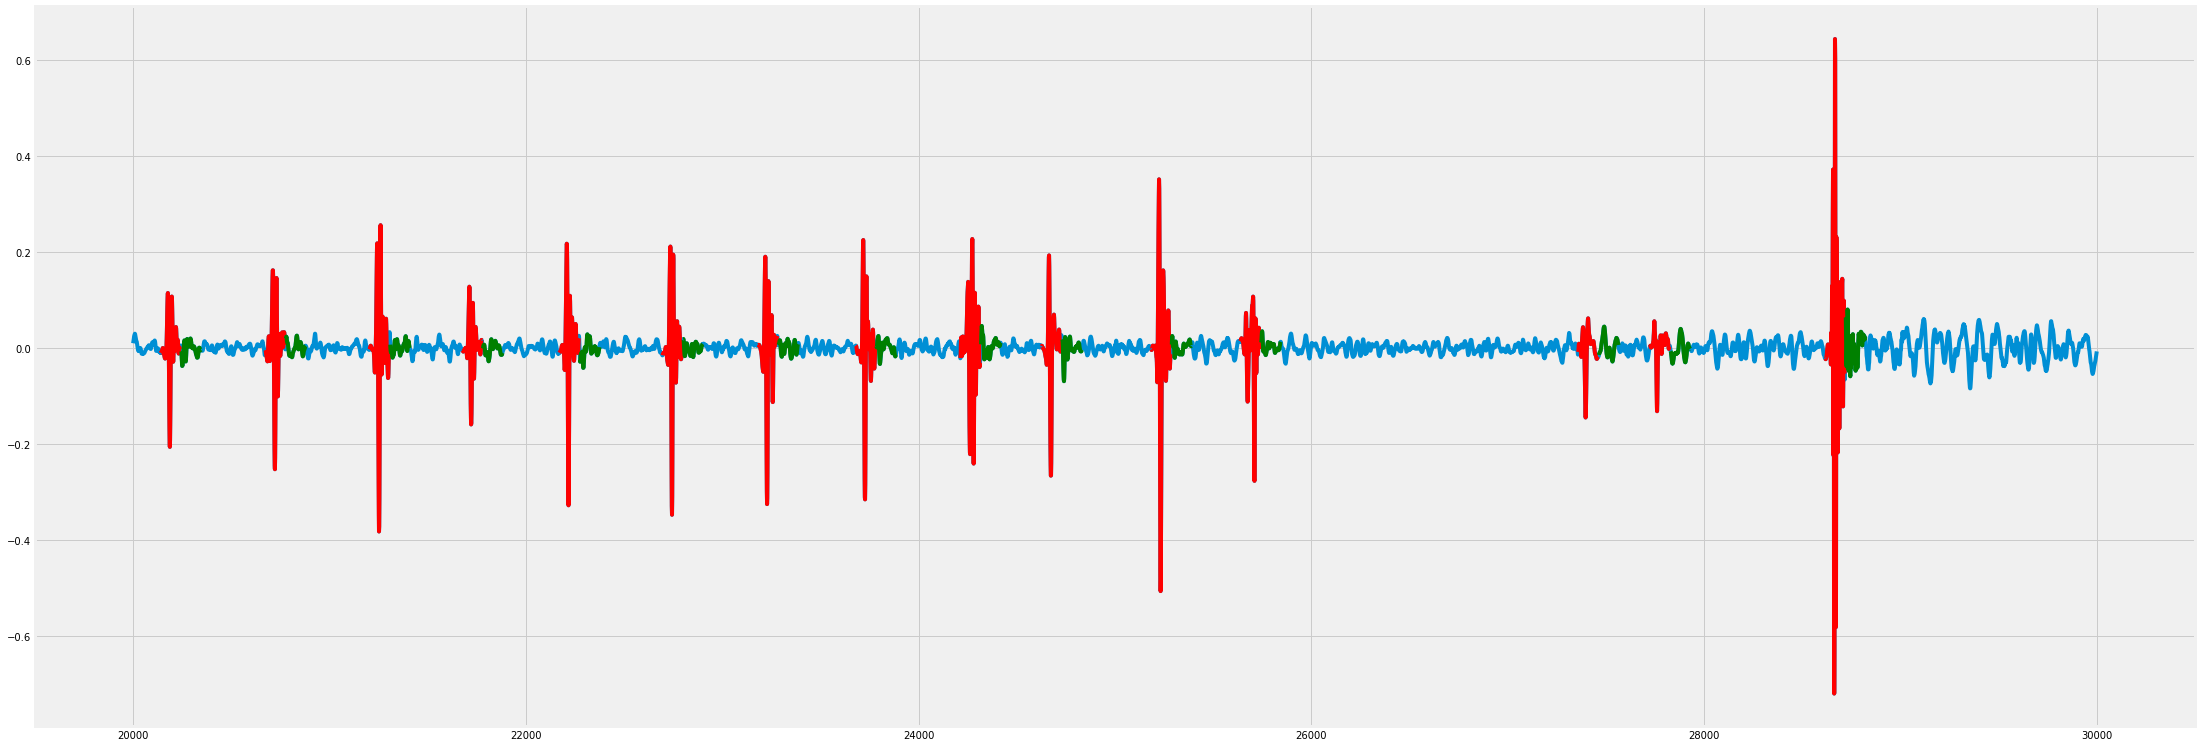

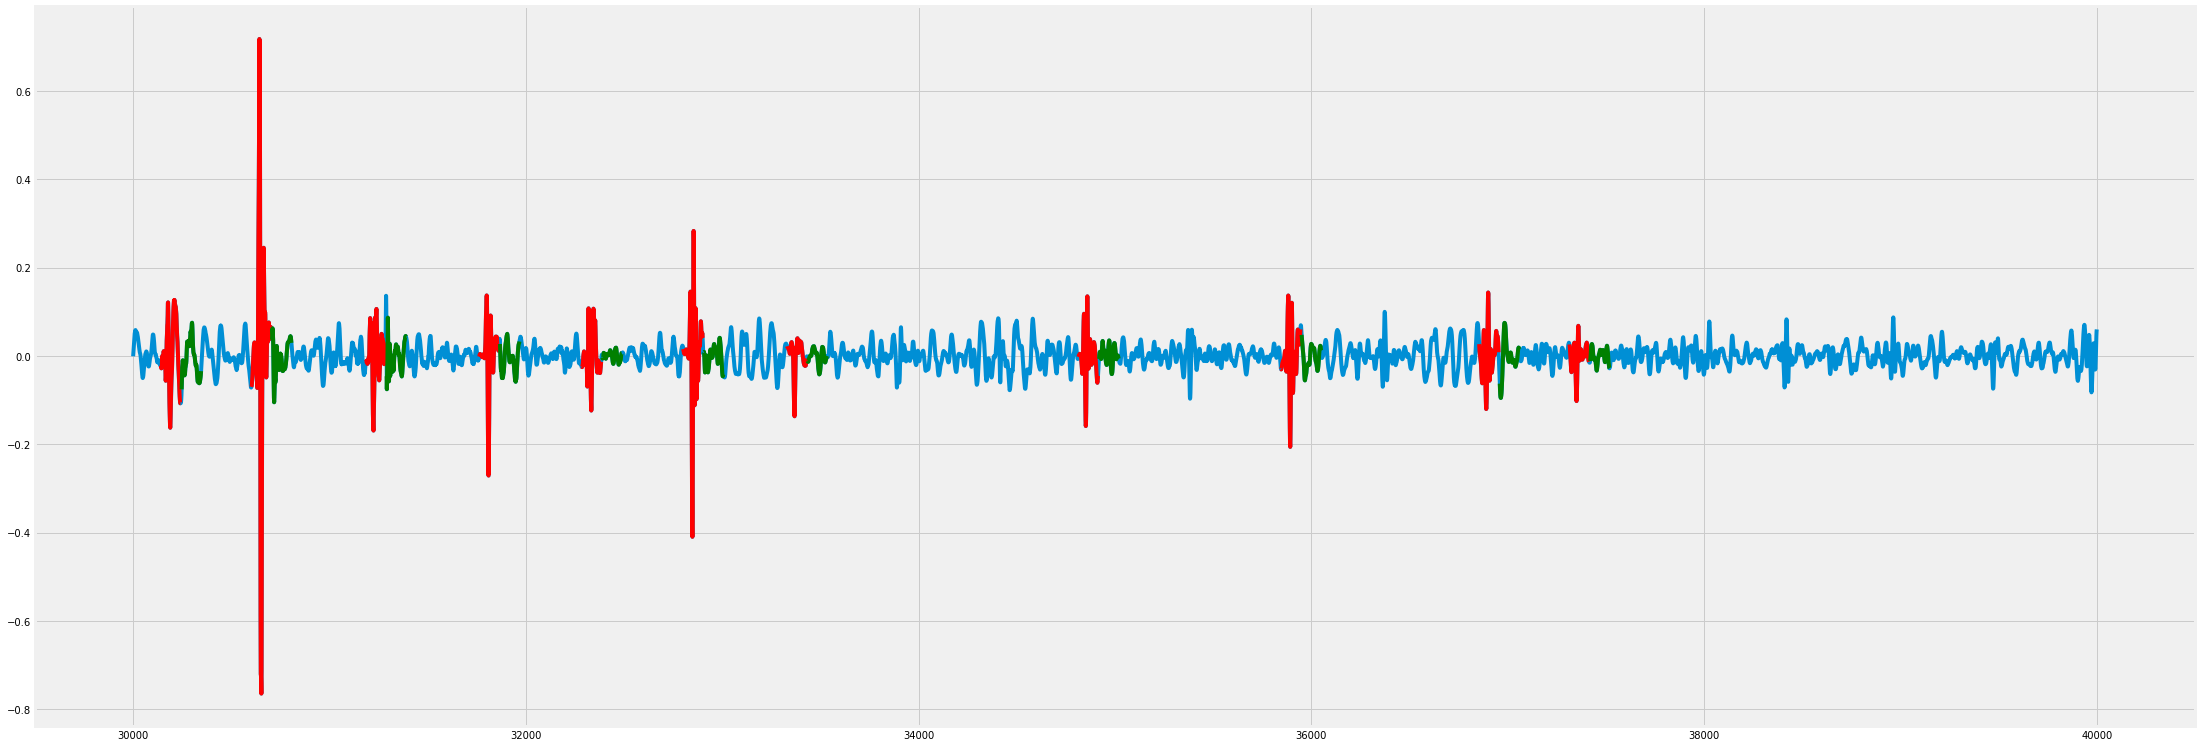

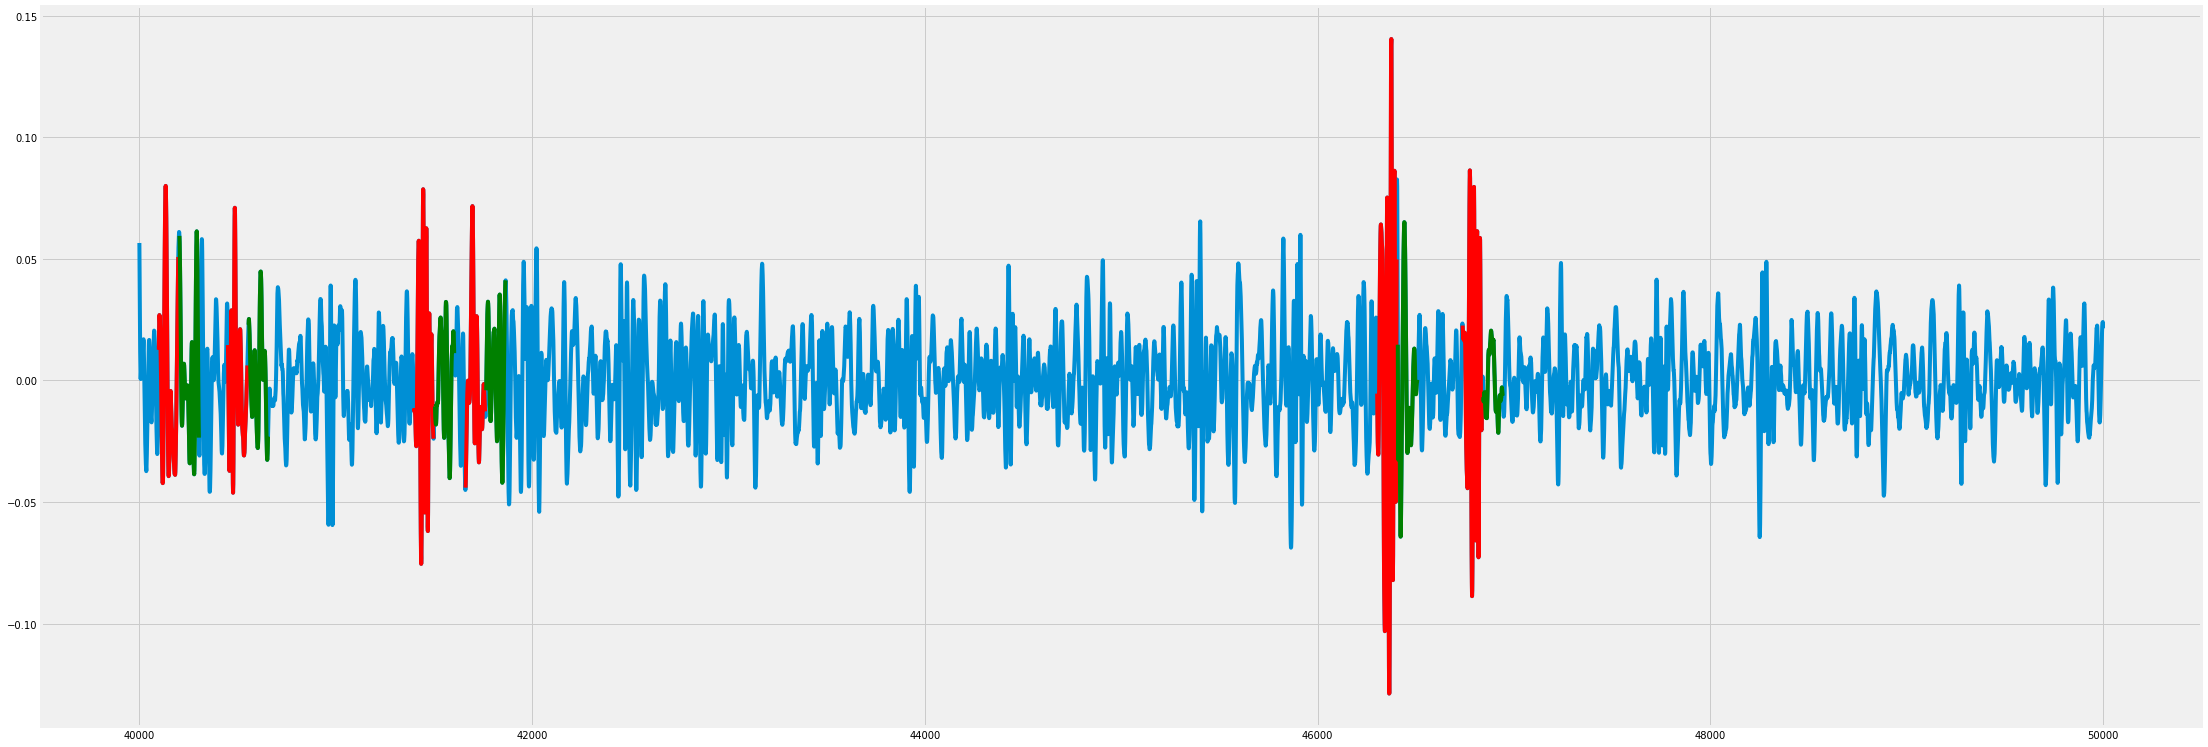

In [40]:
#BOUND = [0.015, 0.025, 0.05, 0.05, 0.03]
BOUND = [0.035, 0.05, 0.1, 0.1, 0.07]
steps = []
rubbish = []
steps1, rubbish1 = steps_amplitude(BOUND, Data_proc[0].Z, steps, rubbish)


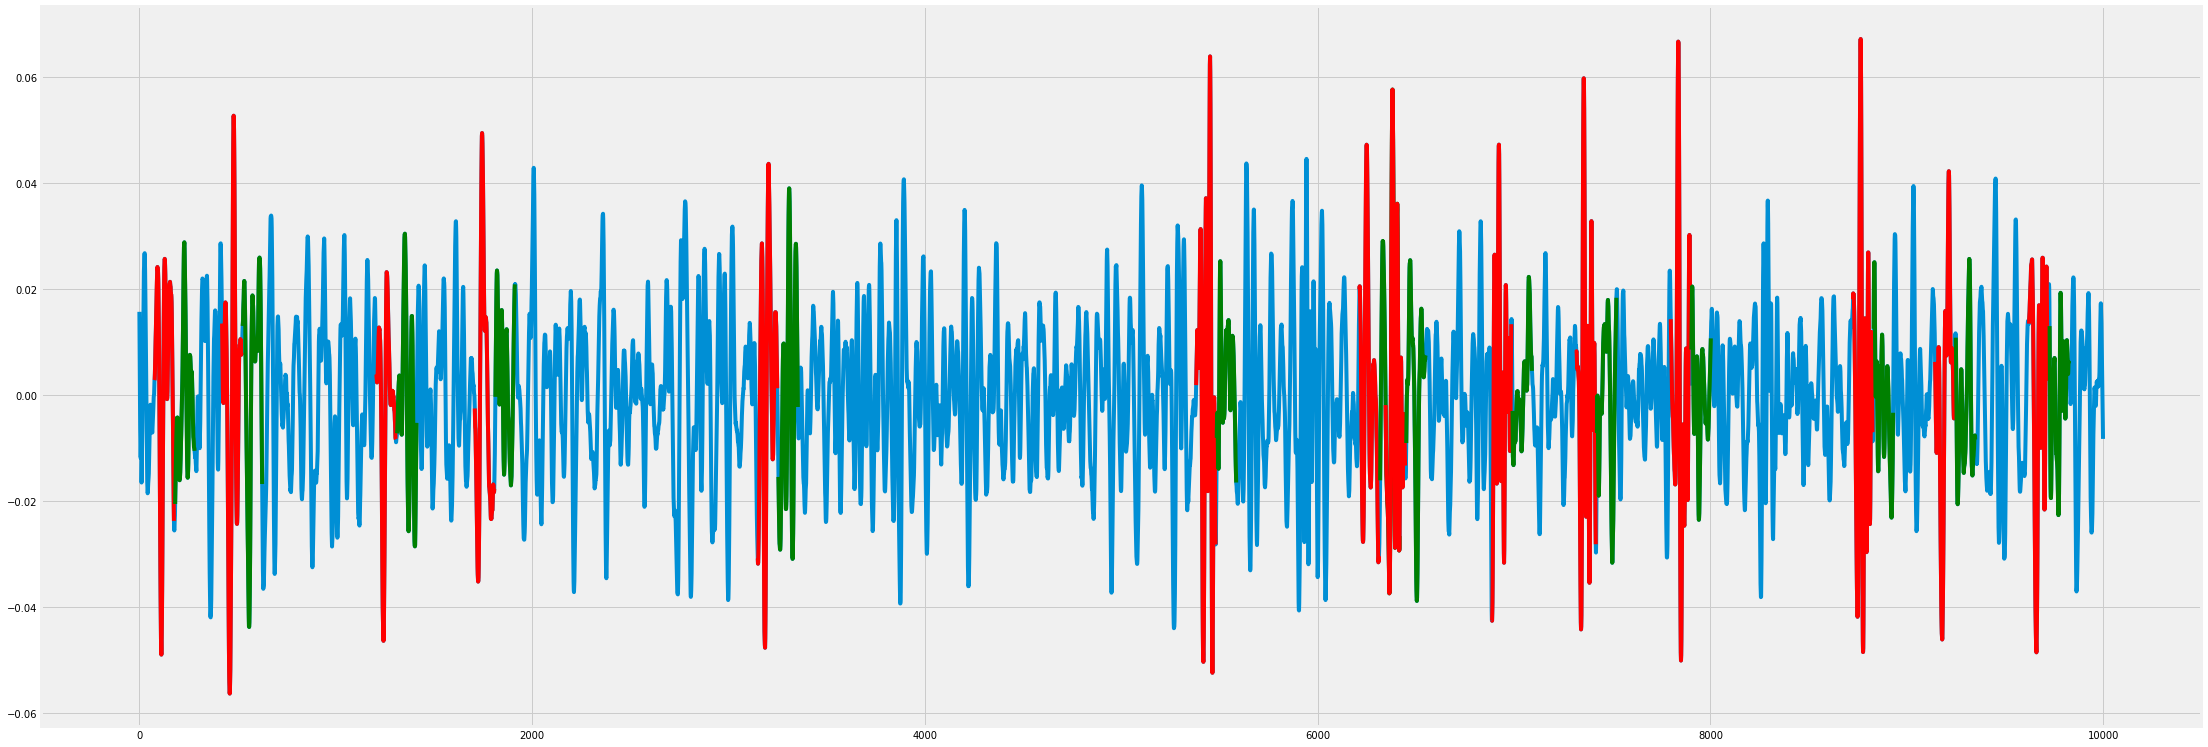

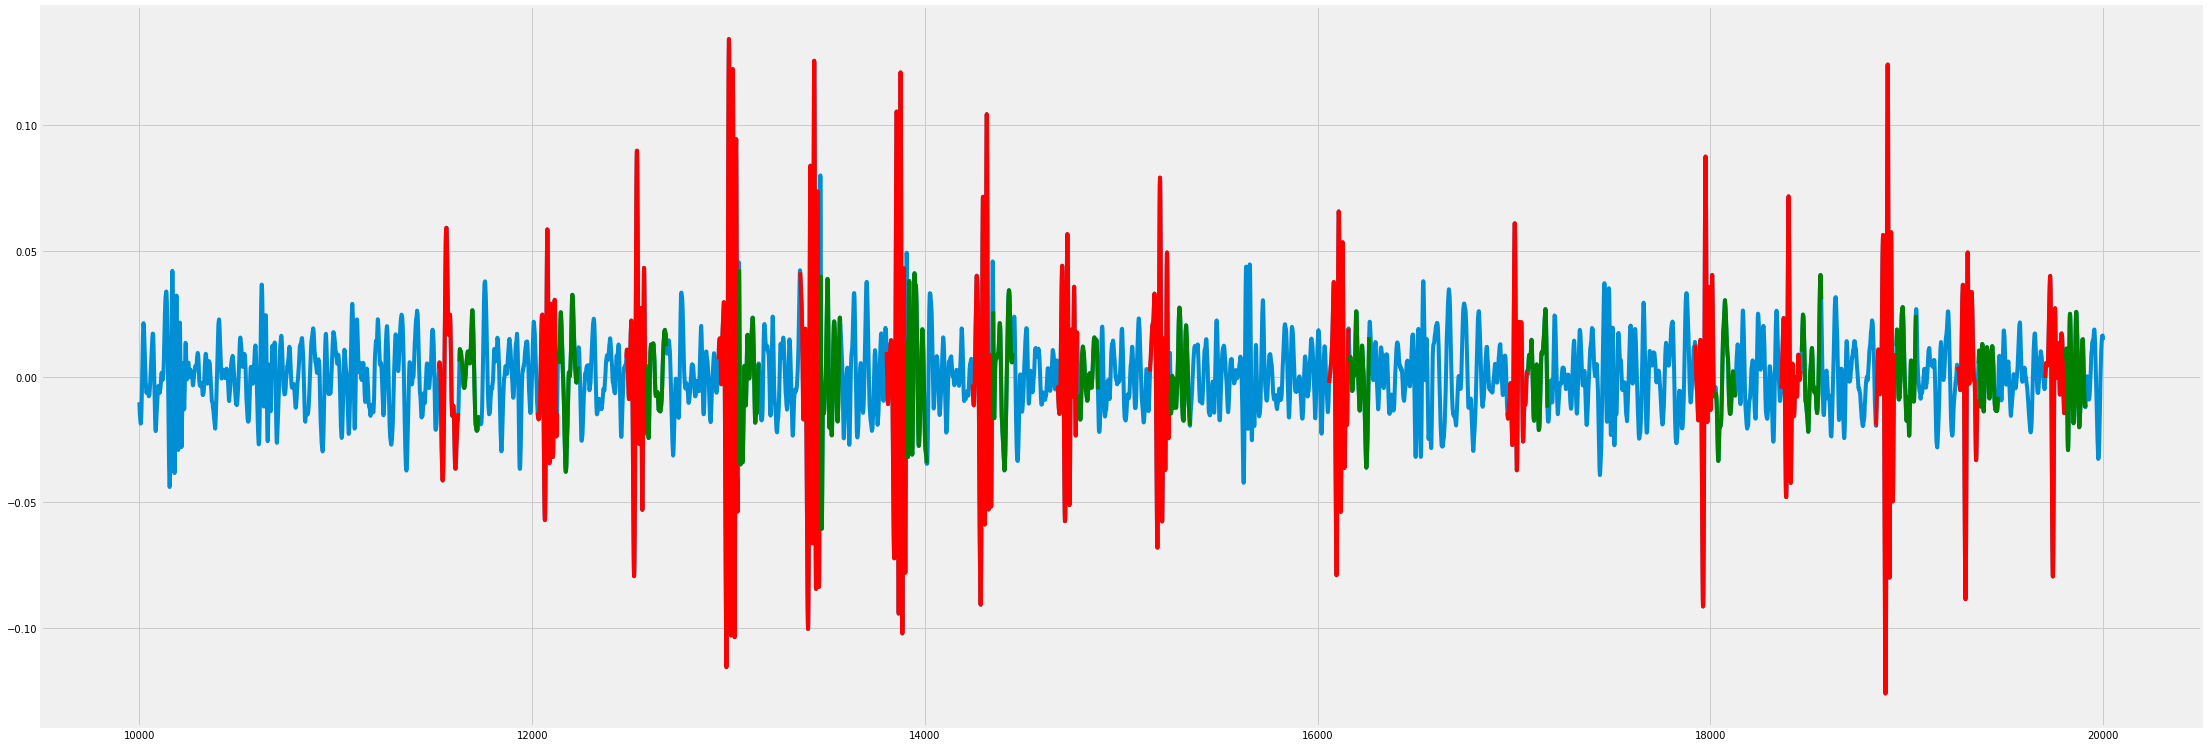

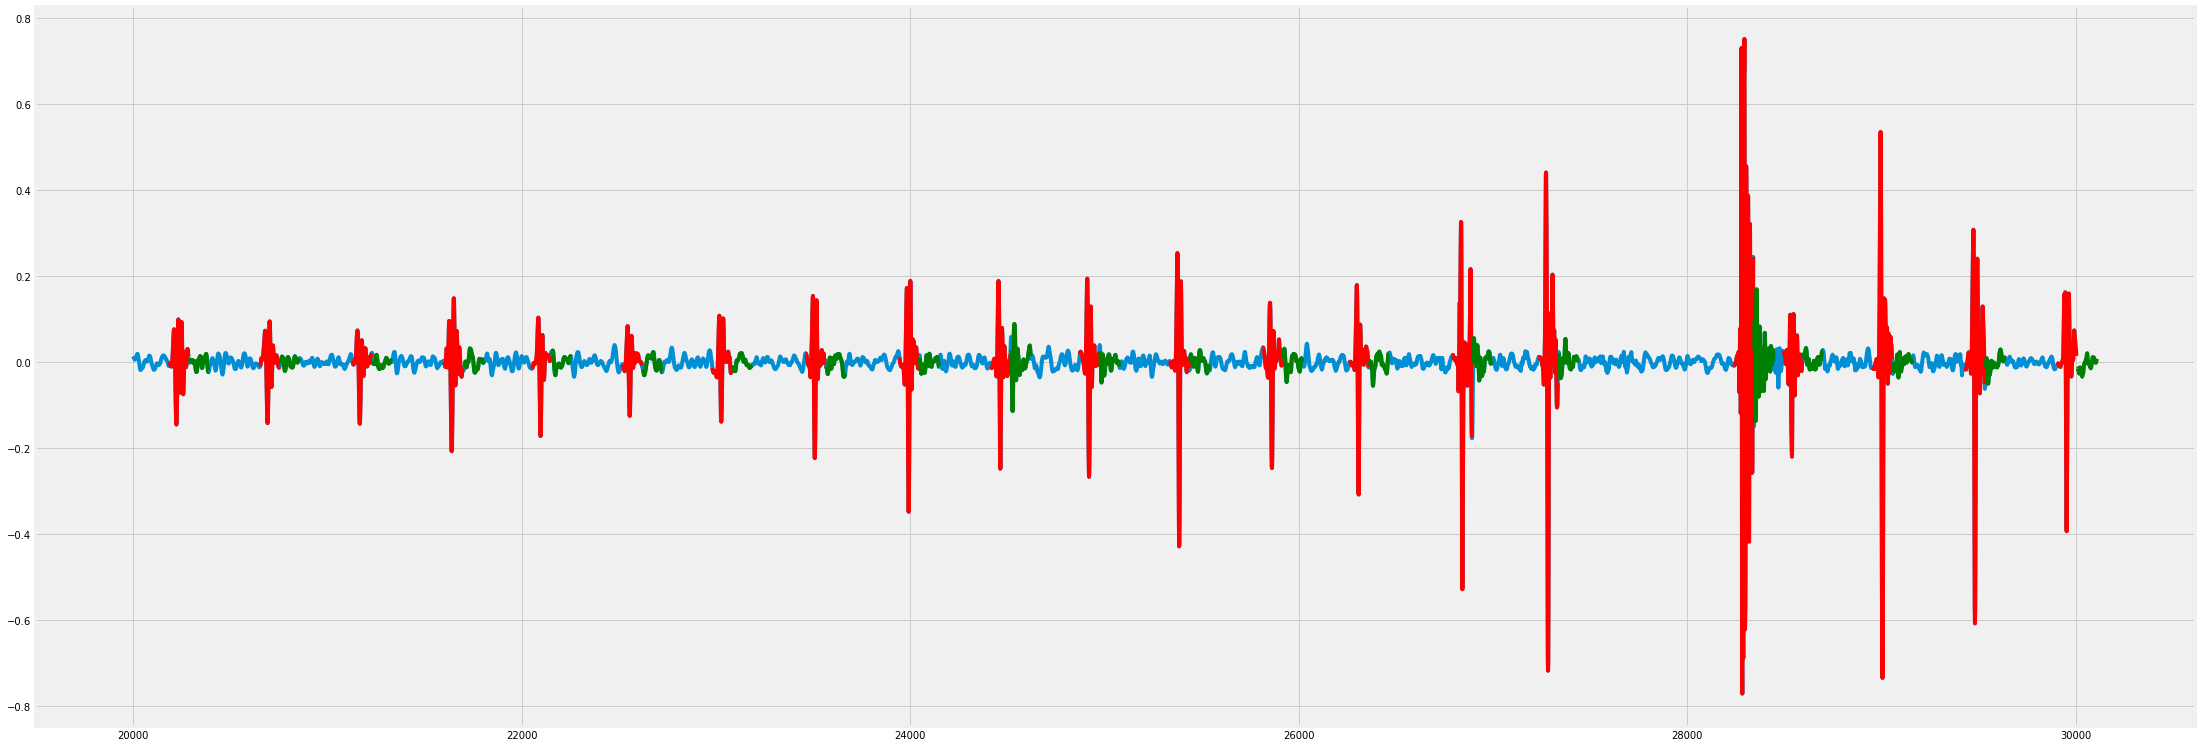

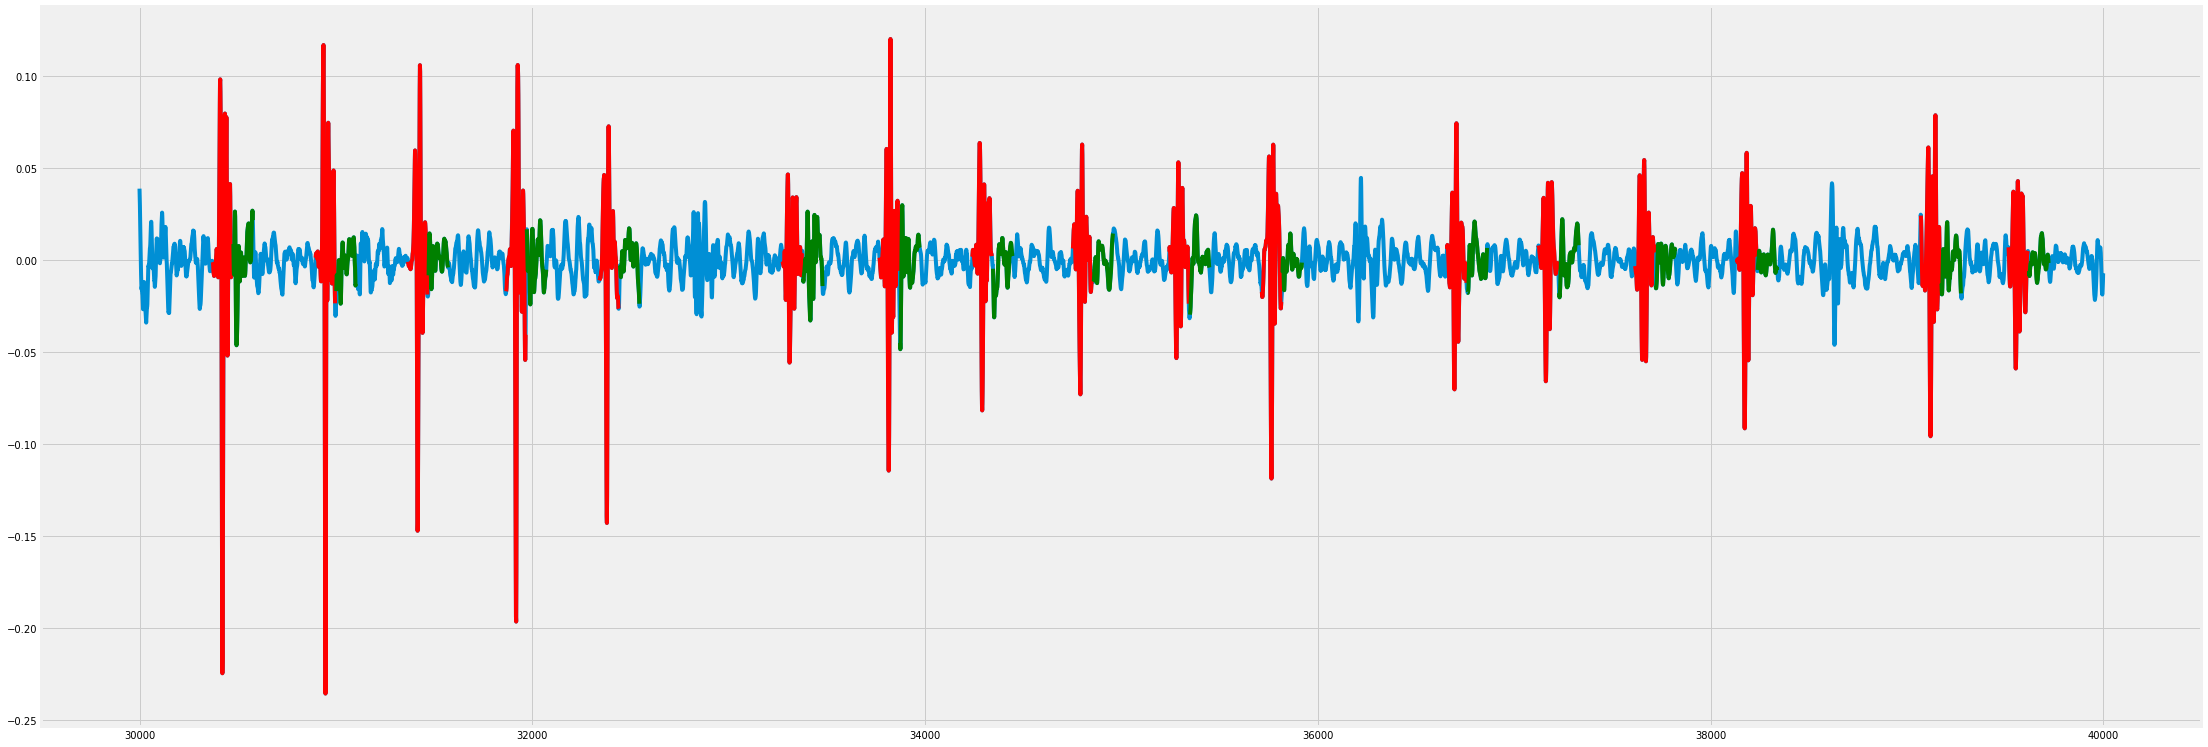

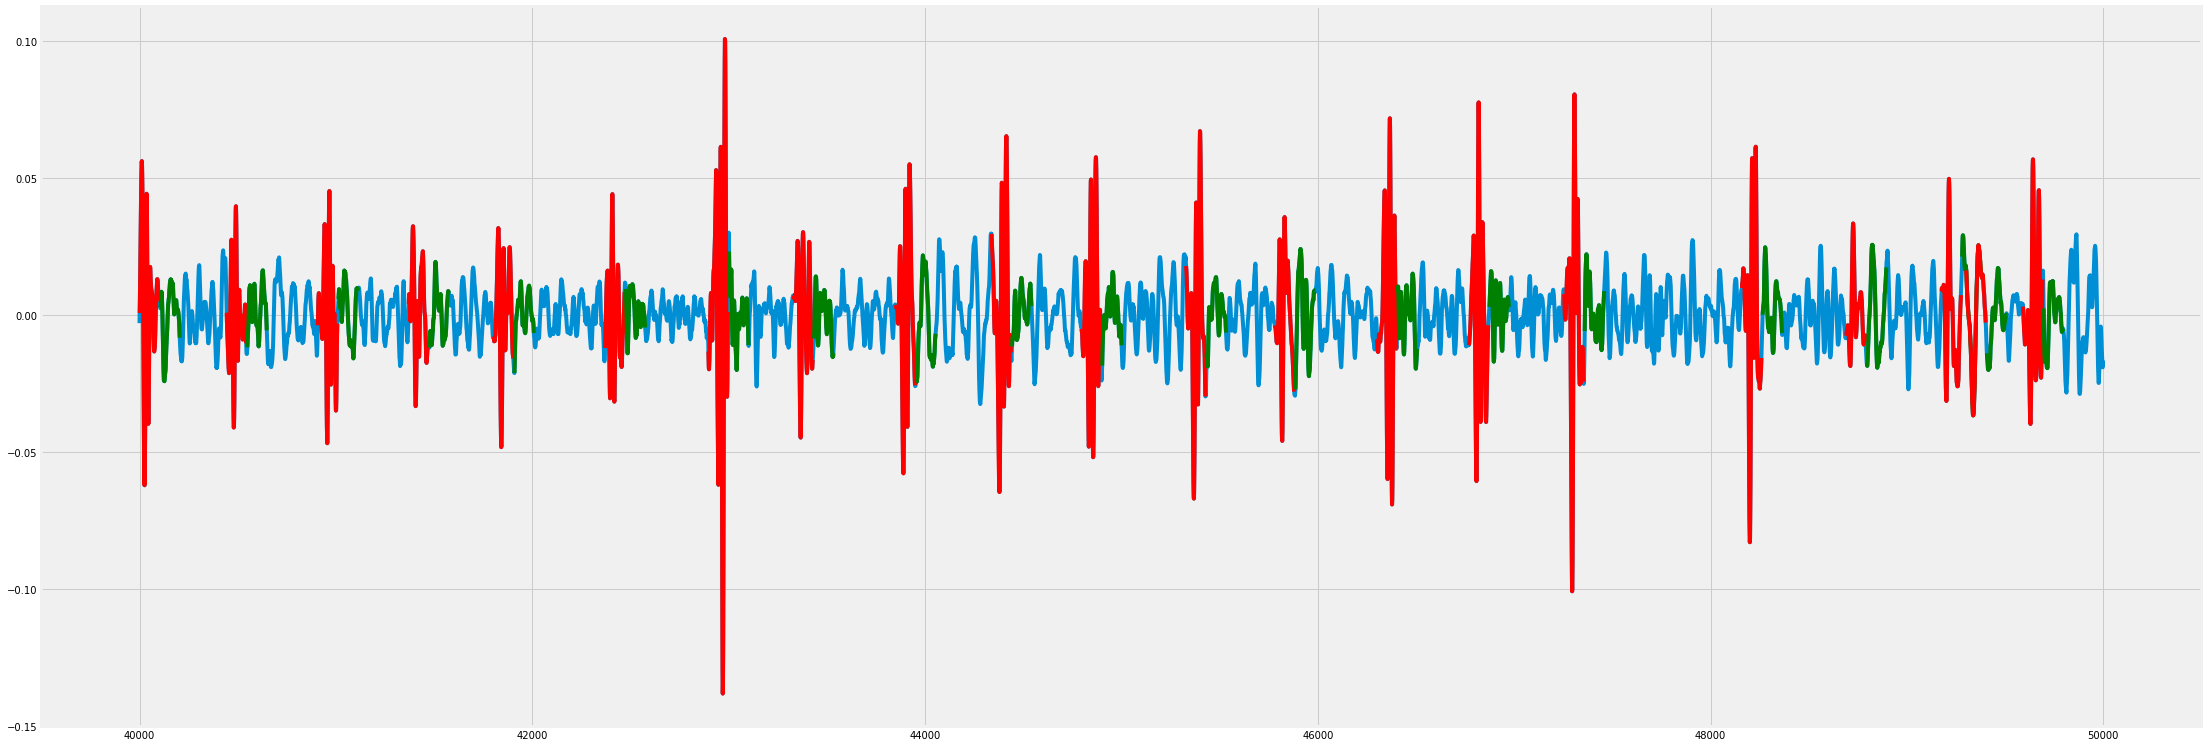

In [41]:
#BOUND = [0.02, 0.02, 0.05, 0.02, 0.02]
BOUND = [0.045, 0.05, 0.1, 0.05, 0.033]
steps1, rubbish1 = steps_amplitude(BOUND, Data_proc[1].Z, steps1, rubbish1)

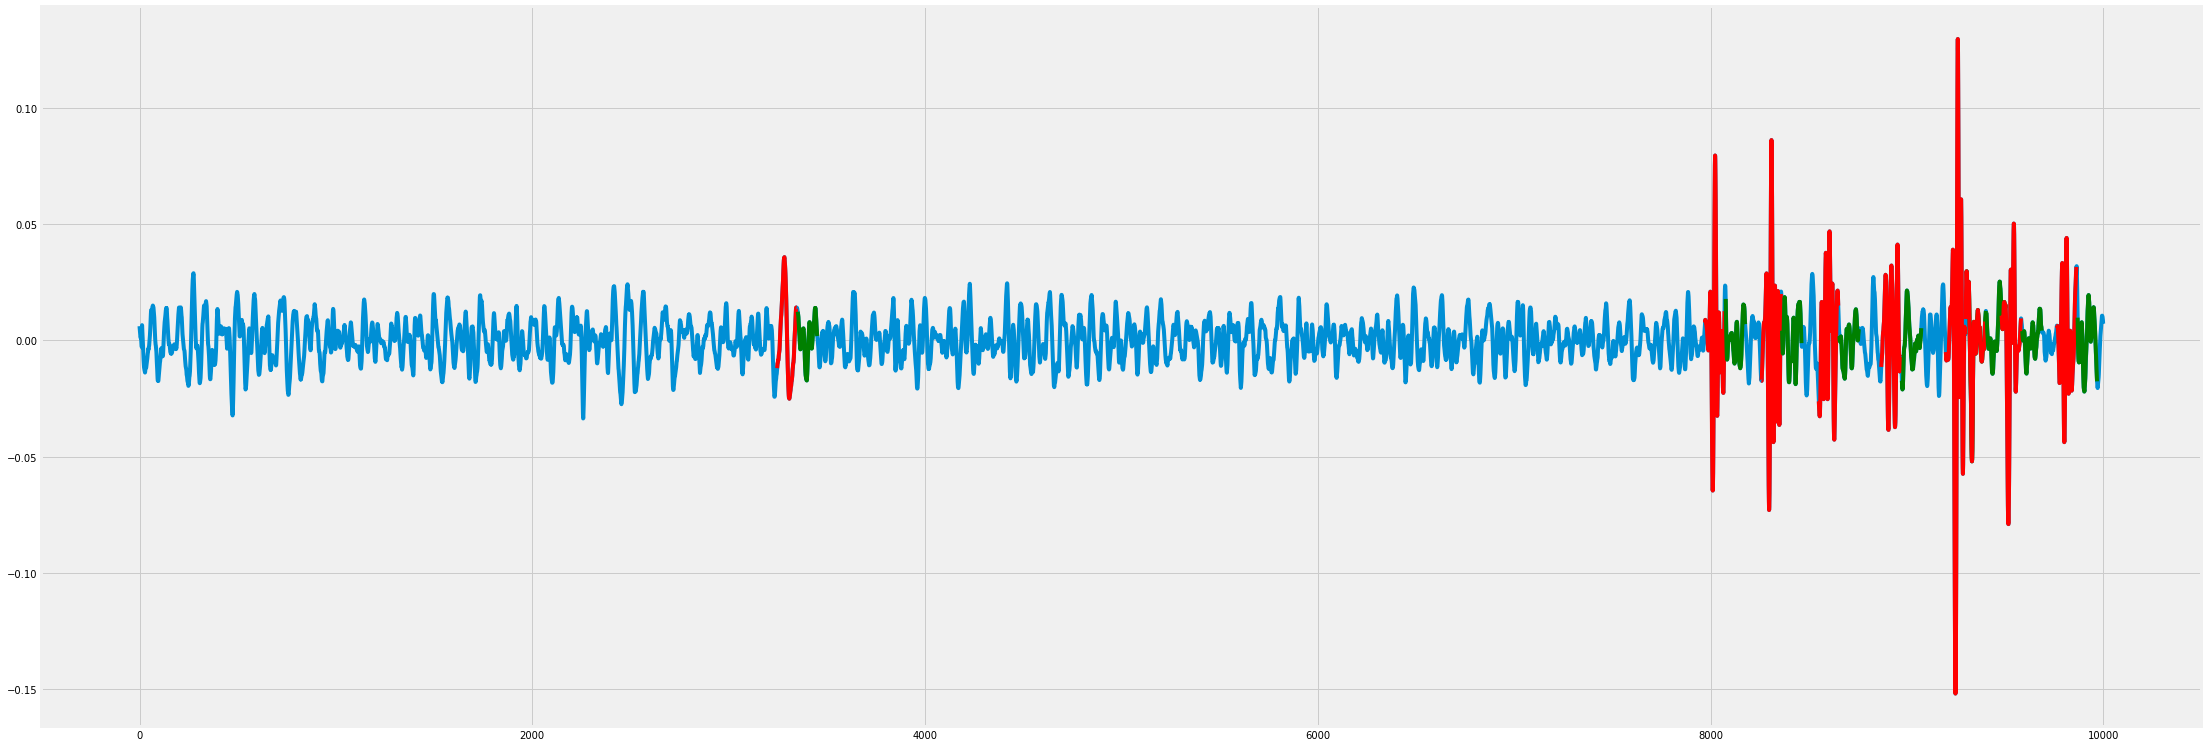

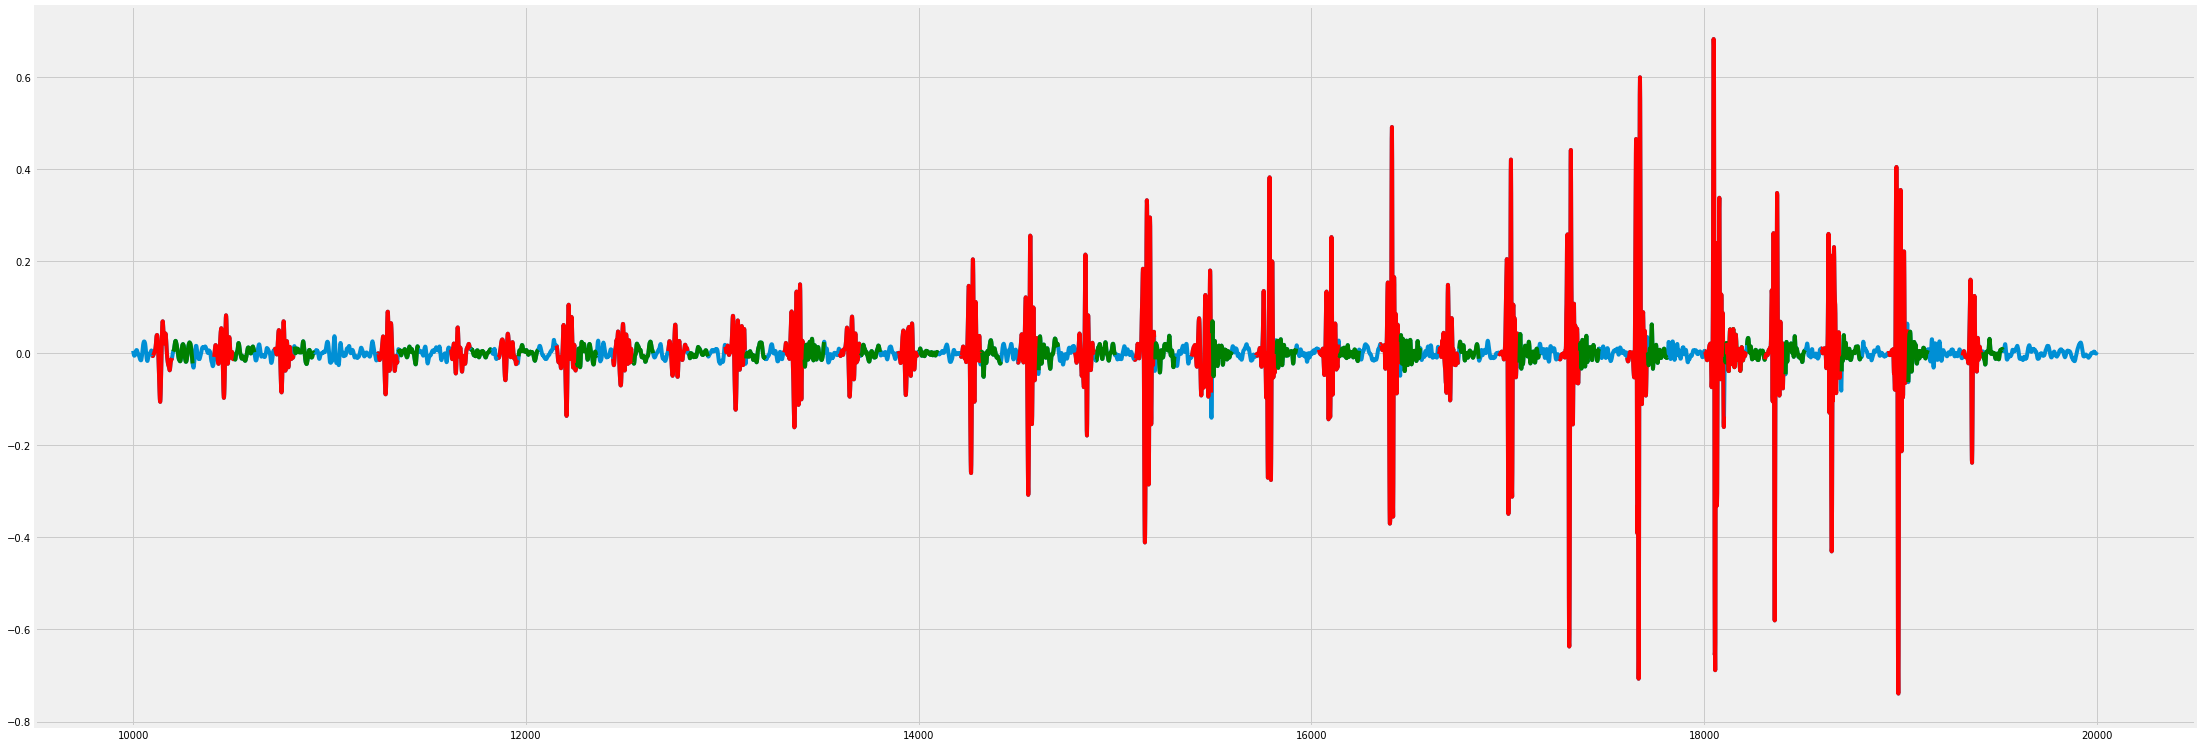

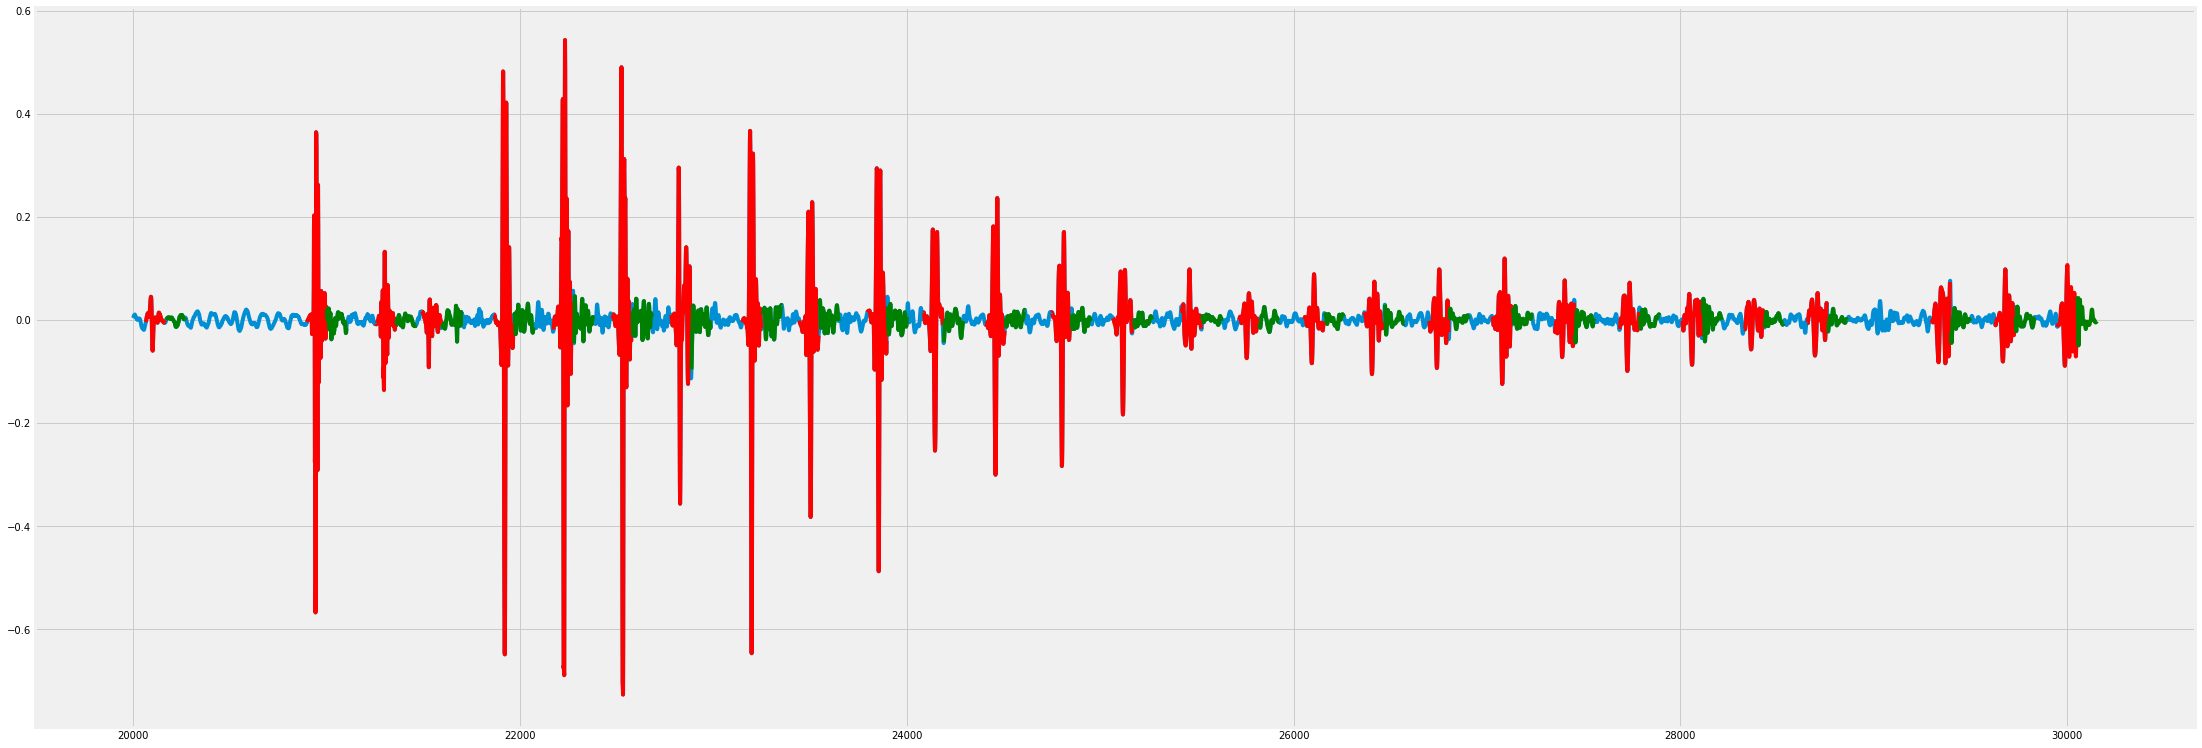

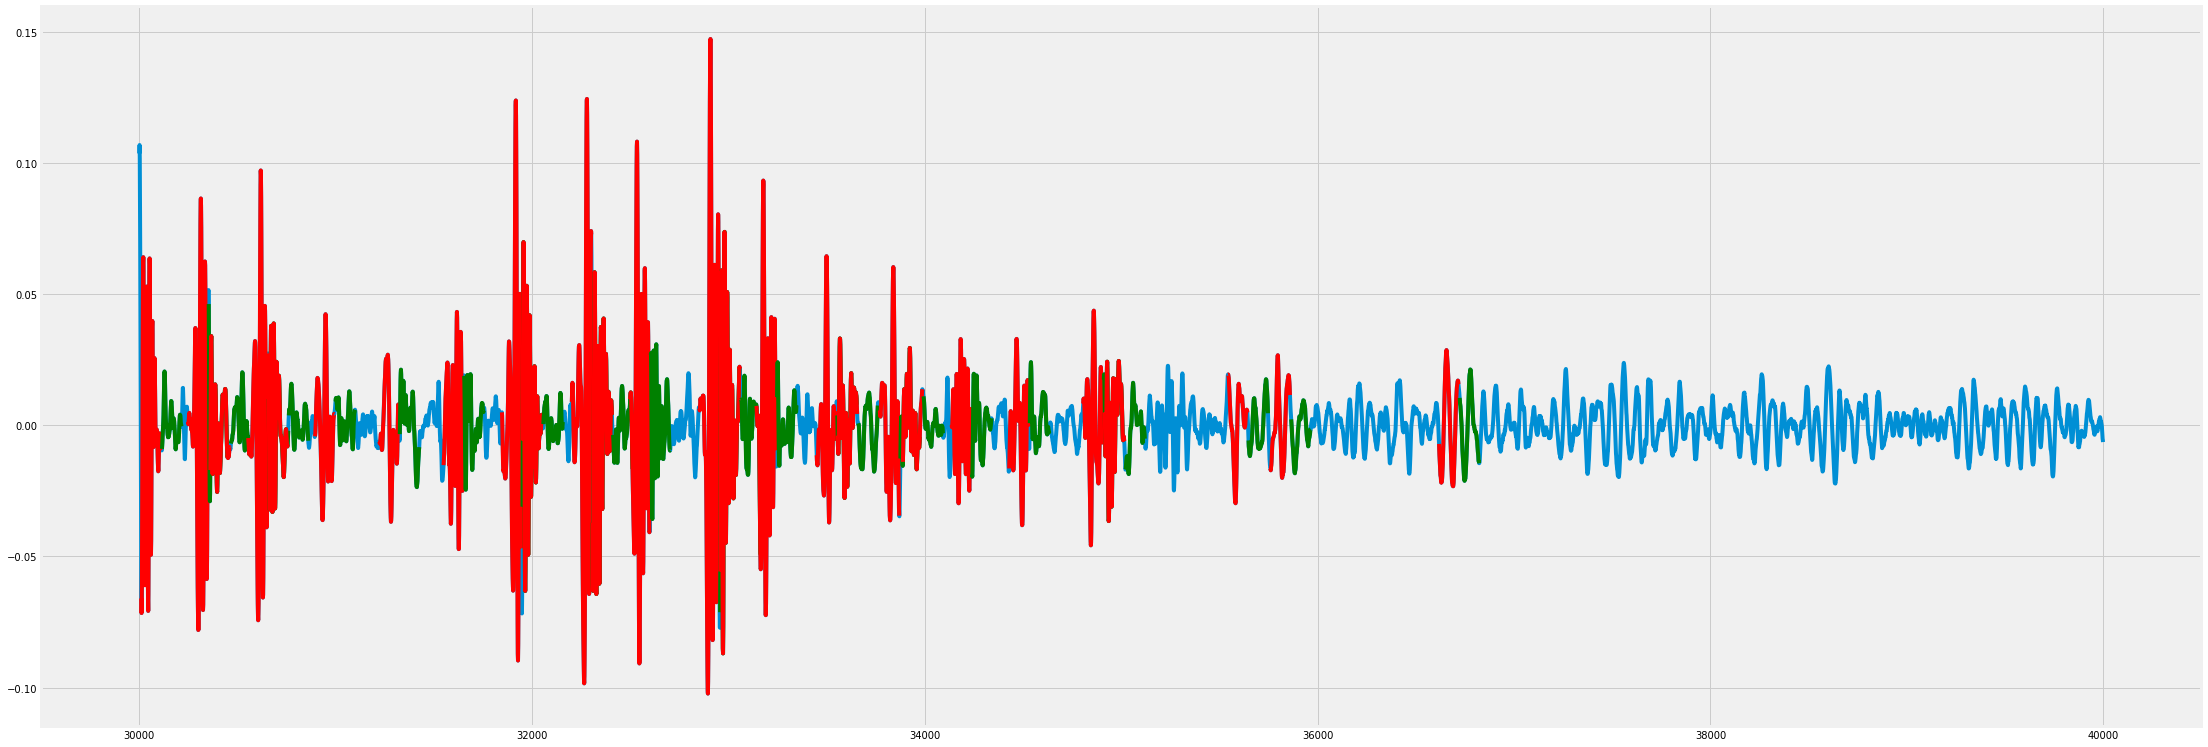

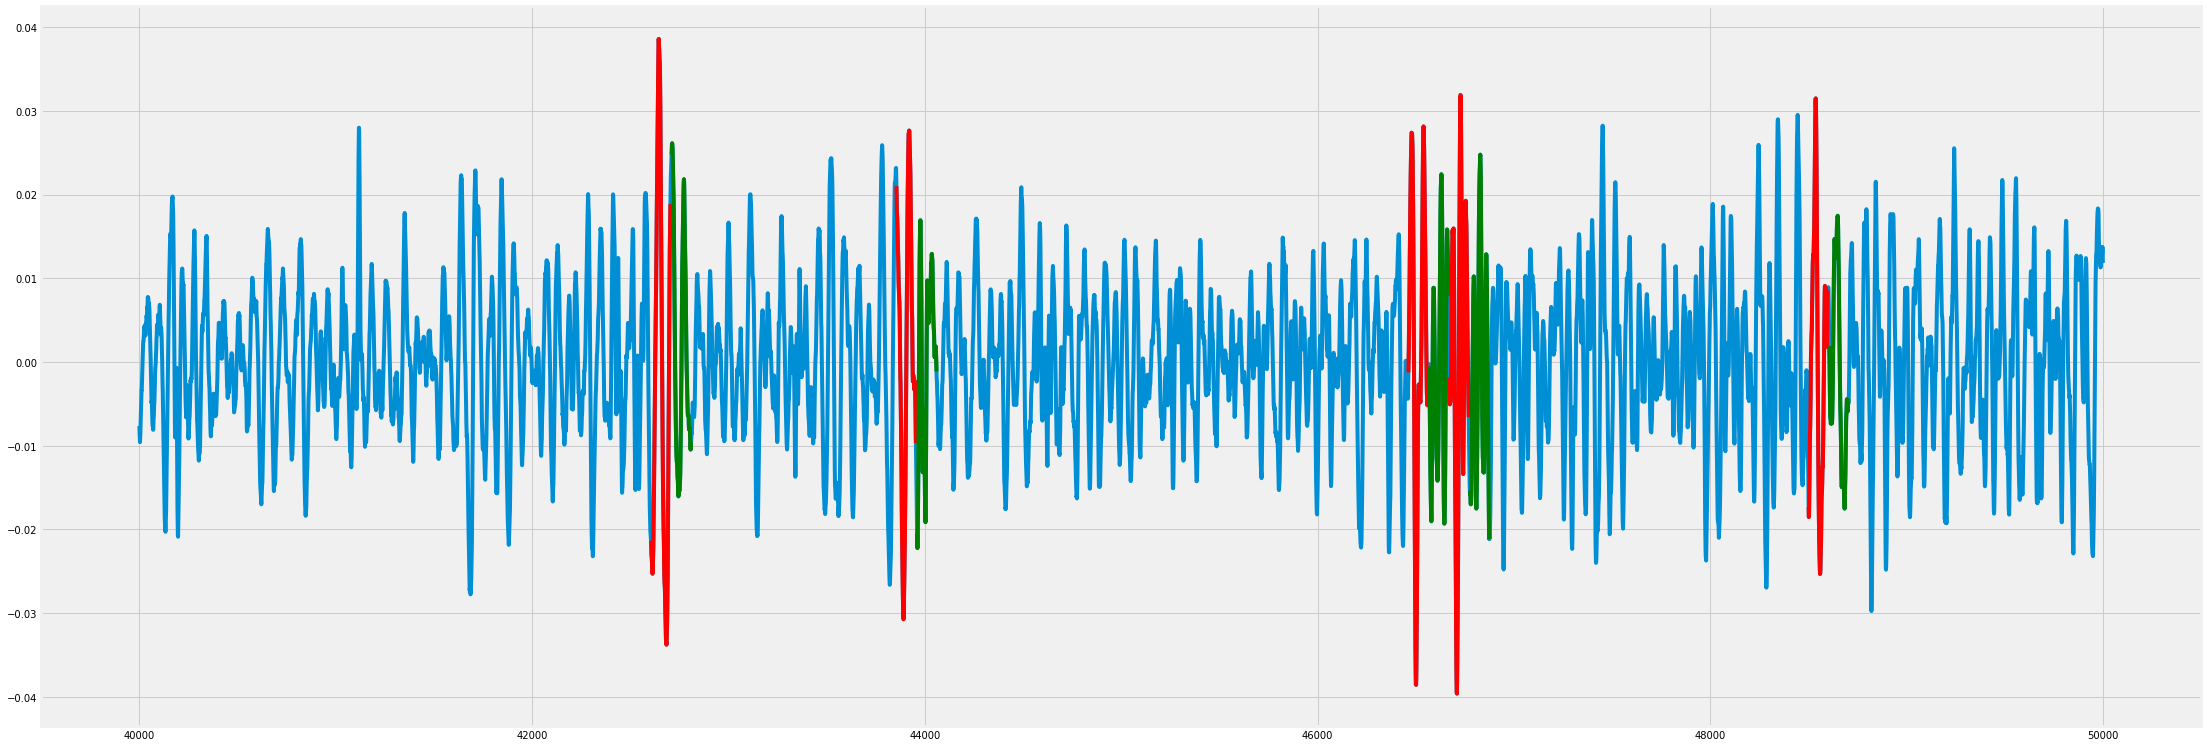

In [42]:
#BOUND = [0.015, 0.03, 0.03, 0.015, 0.015]
BOUND = [0.035, 0.05, 0.05, 0.025, 0.03]
steps = []
rubbish = []
steps1, rubbish1 = steps_amplitude(BOUND, Data_proc[2].Z, steps1, rubbish1)

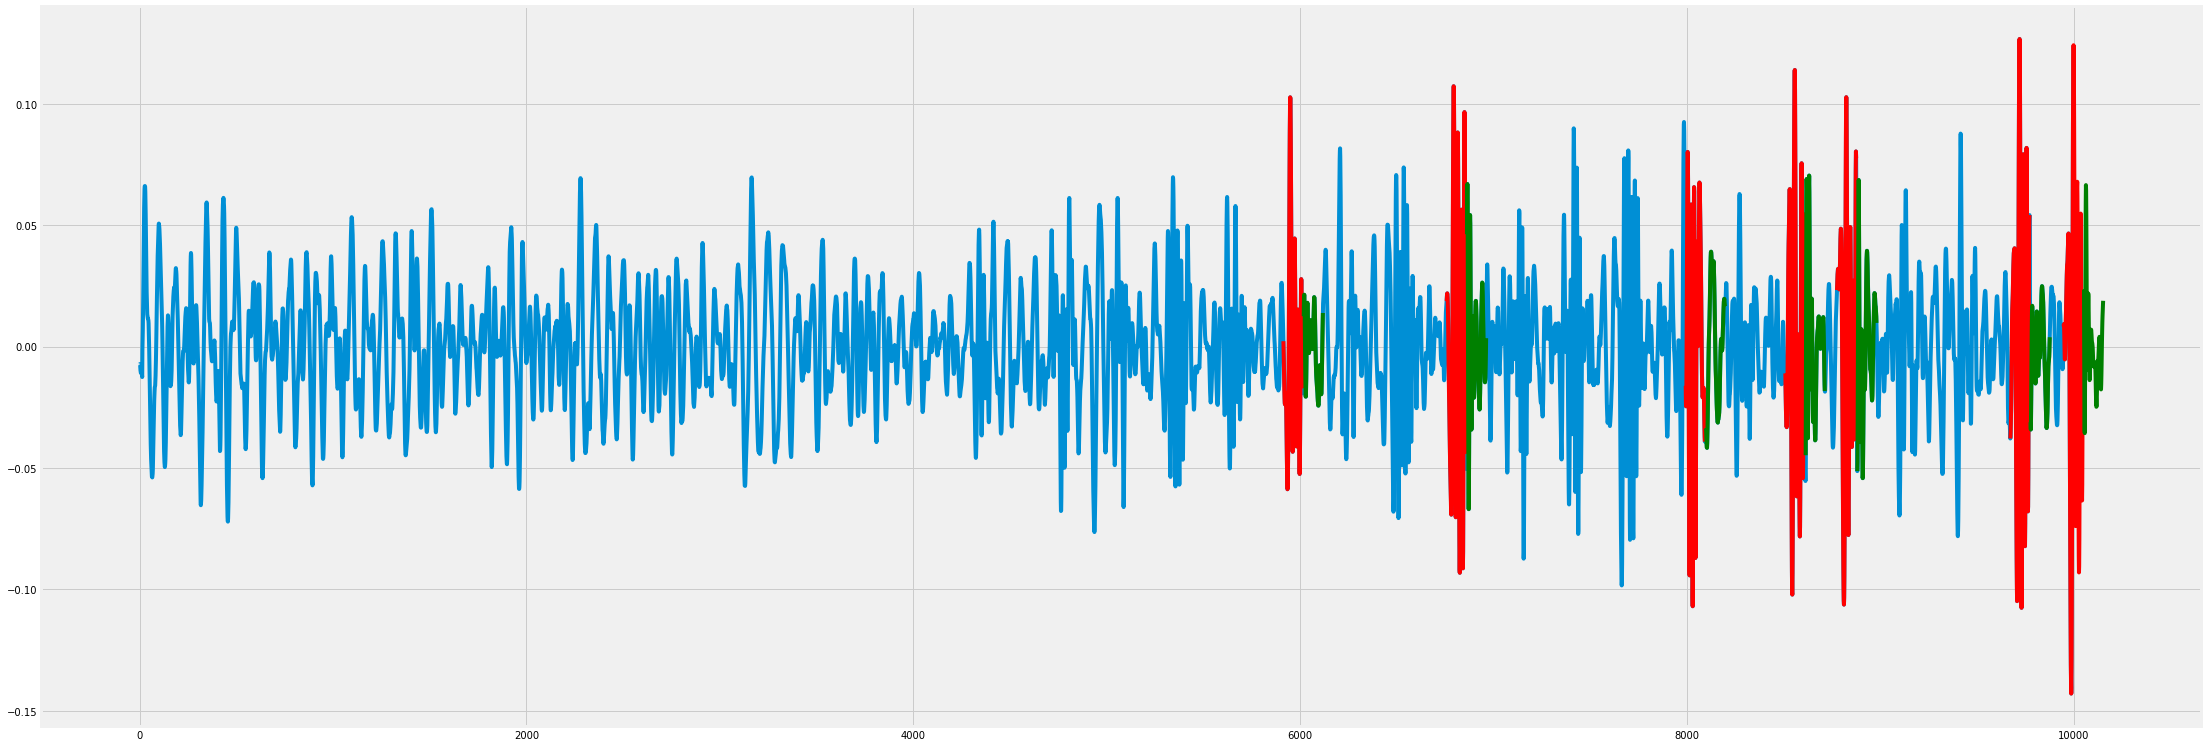

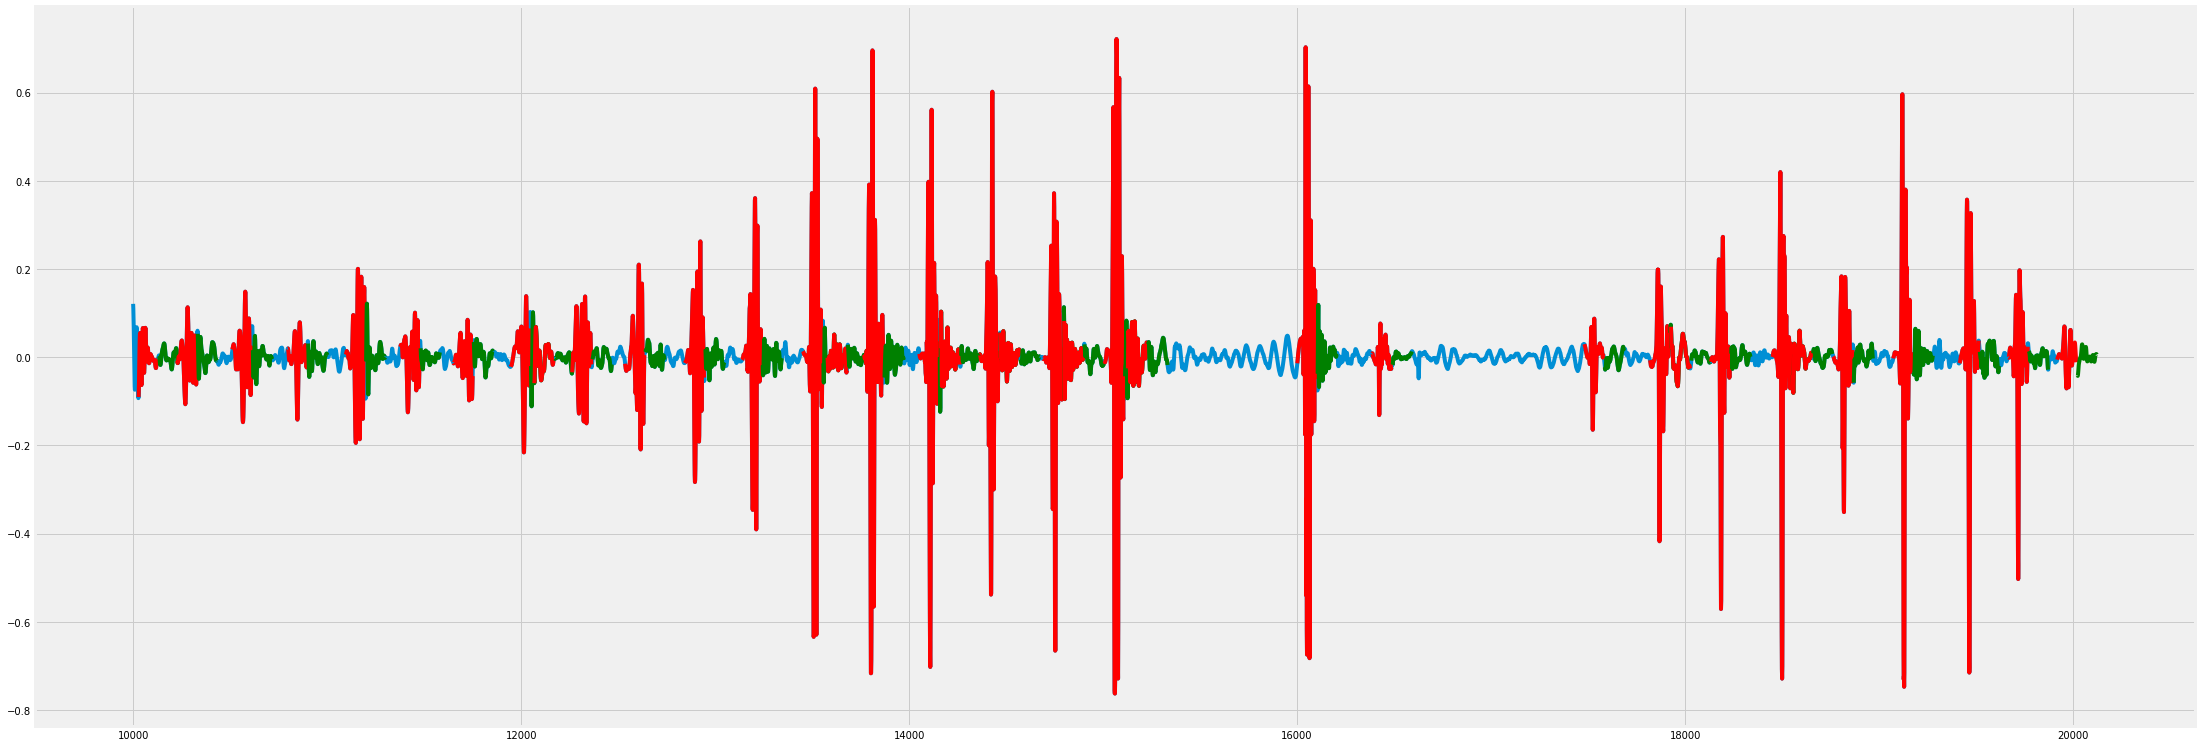

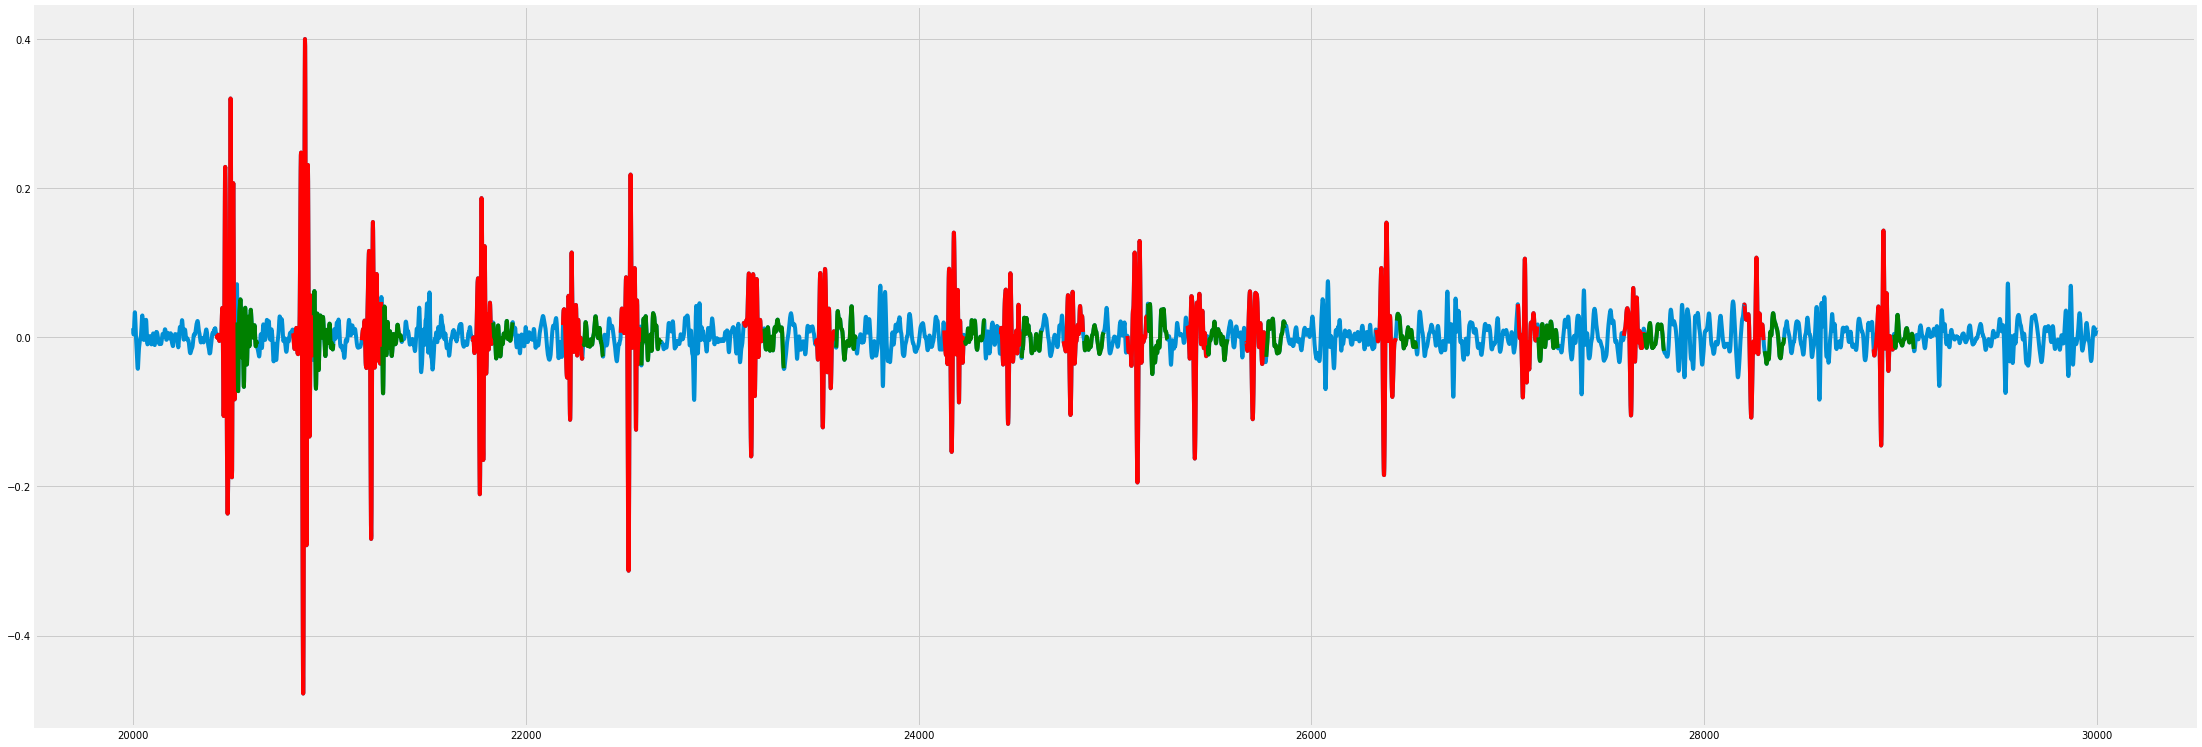

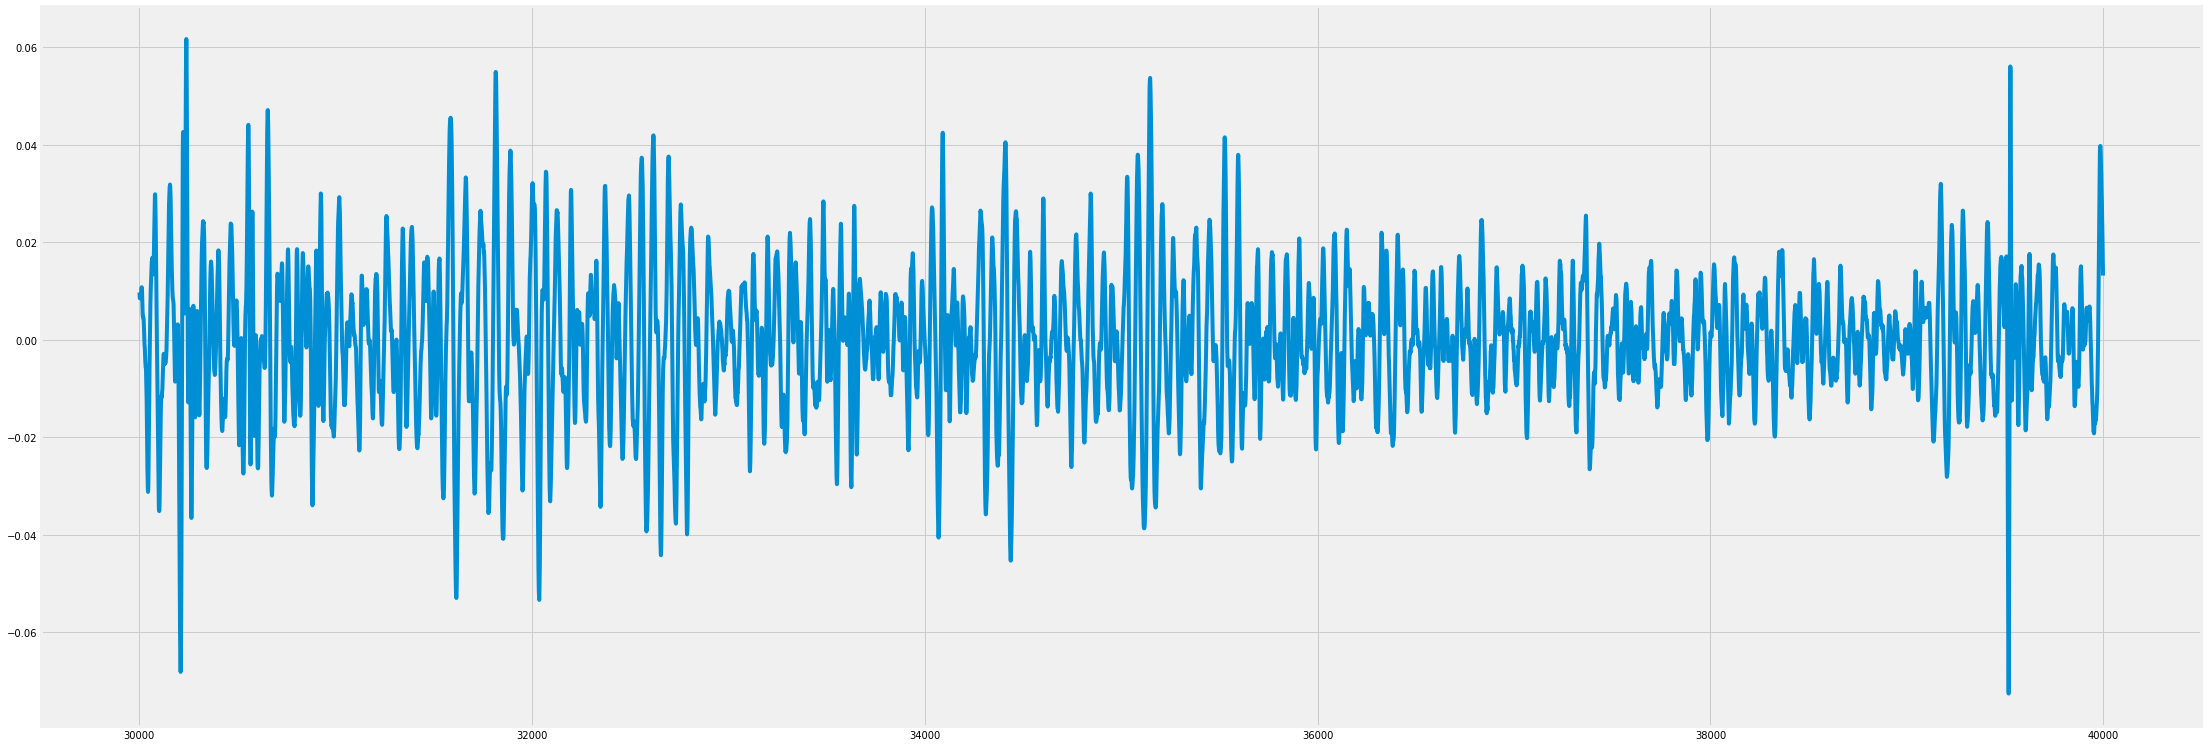

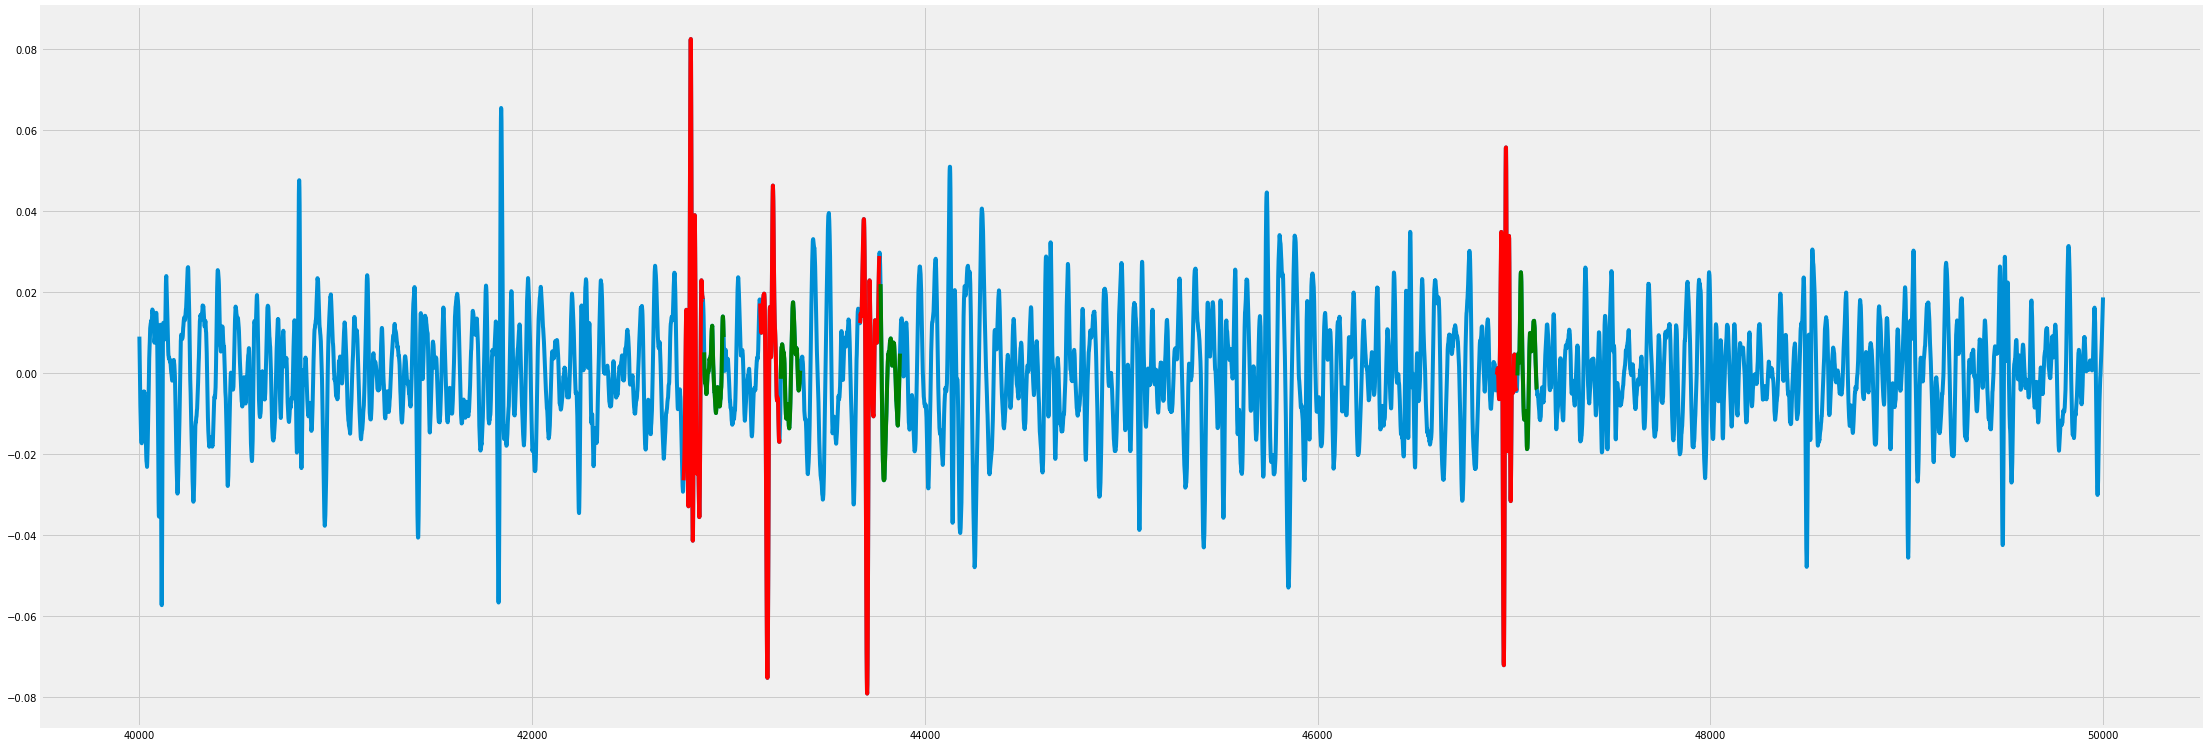

In [43]:
#BOUND = [0.03, 0.04, 0.02, 0.025, 0.025] for tangent hyperbolic
BOUND = [0.1, 0.05, 0.1, 0.1, 0.07]
steps1, rubbish1 = steps_amplitude(BOUND, Data_proc[3].Z, steps1, rubbish1)


In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
import keras.backend as K
import warnings
warnings.filterwarnings('ignore')


In [45]:
K.clear_session()
model = Sequential()
model.add(Dense(50, activation='tanh', input_dim=100))
model.add(Dense(50, activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 7,702
Trainable params: 7,702
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
rubbish1 = np.array(rubbish1)
rubbish1 = 4*rubbish1
print(rubbish1.shape)

(325, 100)


In [47]:
steps1 = np.concatenate((steps1, np.ones((len(steps1), 1))), axis = 1) ###Второй раз не запускать
rubbish1 = np.concatenate((rubbish1, np.zeros((len(rubbish1), 1))), axis = 1)
dataset1 = np.concatenate((steps1, rubbish1), axis = 0)
np.random.shuffle(dataset1)

In [48]:
dataset1.shape
datatrain = dataset1[:450]
datatest = dataset1[450:]
y_train_hot = np_utils.to_categorical(datatrain[:, 100], 2)


In [49]:
history = model.fit(datatrain[:, :100],
                      y_train_hot,
                      batch_size=2,
                      epochs=20,   verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
450/450 [==============================] - 1s 2ms/step - loss: 0.2414 - acc: 0.5622
Epoch 2/20
450/450 [==============================] - 0s 477us/step - loss: 0.2291 - acc: 0.6000
Epoch 3/20
450/450 [==============================] - 0s 471us/step - loss: 0.2234 - acc: 0.6400
Epoch 4/20
450/450 [==============================] - 0s 509us/step - loss: 0.2239 - acc: 0.6622
Epoch 5/20
450/450 [==============================] - 0s 471us/step - loss: 0.2203 - acc: 0.6644
Epoch 6/20
450/450 [==============================] - 0s 487us/step - loss: 0.2202 - acc: 0.6689
Epoch 7/20
450/450 [==============================] - 0s 507us/step - loss: 0.2179 - acc: 0.6711
Epoch 8/20
450/450 [==============================] - 0s 589us/step - loss: 0.2184 - acc: 0.6622
Epoch 9/20
450/450 [==============================] - 0s 489us/step - loss: 0.2177 - acc: 0.6800
Epoch 10/20
450/450 [==============================] - 0s 488us/step - loss: 0.21

In [50]:
y_pred_test = model.predict(datatest[:, :100])
ans = []
for i in range(len(y_pred_test)):
    if ( y_pred_test[i,0] > y_pred_test[i,1]):
        ans.append(0)
    else:
        ans.append(1)
s = 0
for i in range(len(y_pred_test)):
    if (ans[i] == datatest[i, 100]):
        s +=1
print('guessed', s, 'from', len(ans), 'probability', s/len(y_pred_test) )

guessed 135 from 200 probability 0.675


In [51]:
Data_new = []
Data_filtered_new = []
for i in range(13,15):
    data = pd.read_csv(f'F:\\datasteps\\{i}_100s.csv', sep=';', header = None) 
    data.columns = ["X", "Y", "Y1", "Z"]
    data = data[['X', 'Y', 'Z']]
    Data_new.append(data)

FileNotFoundError: File b'F:\\datasteps\\13_100s.csv' does not exist

In [52]:
Data_new = []
datanoise = pd.read_csv('F:\\datastep\\1s.csv', sep=';', header = None) 
datanoise.columns = ["X", "Y", "Y1", "Z"]
datanoise = datanoise[['X', 'Y', 'Z']]
Data_new.append(datanoise)

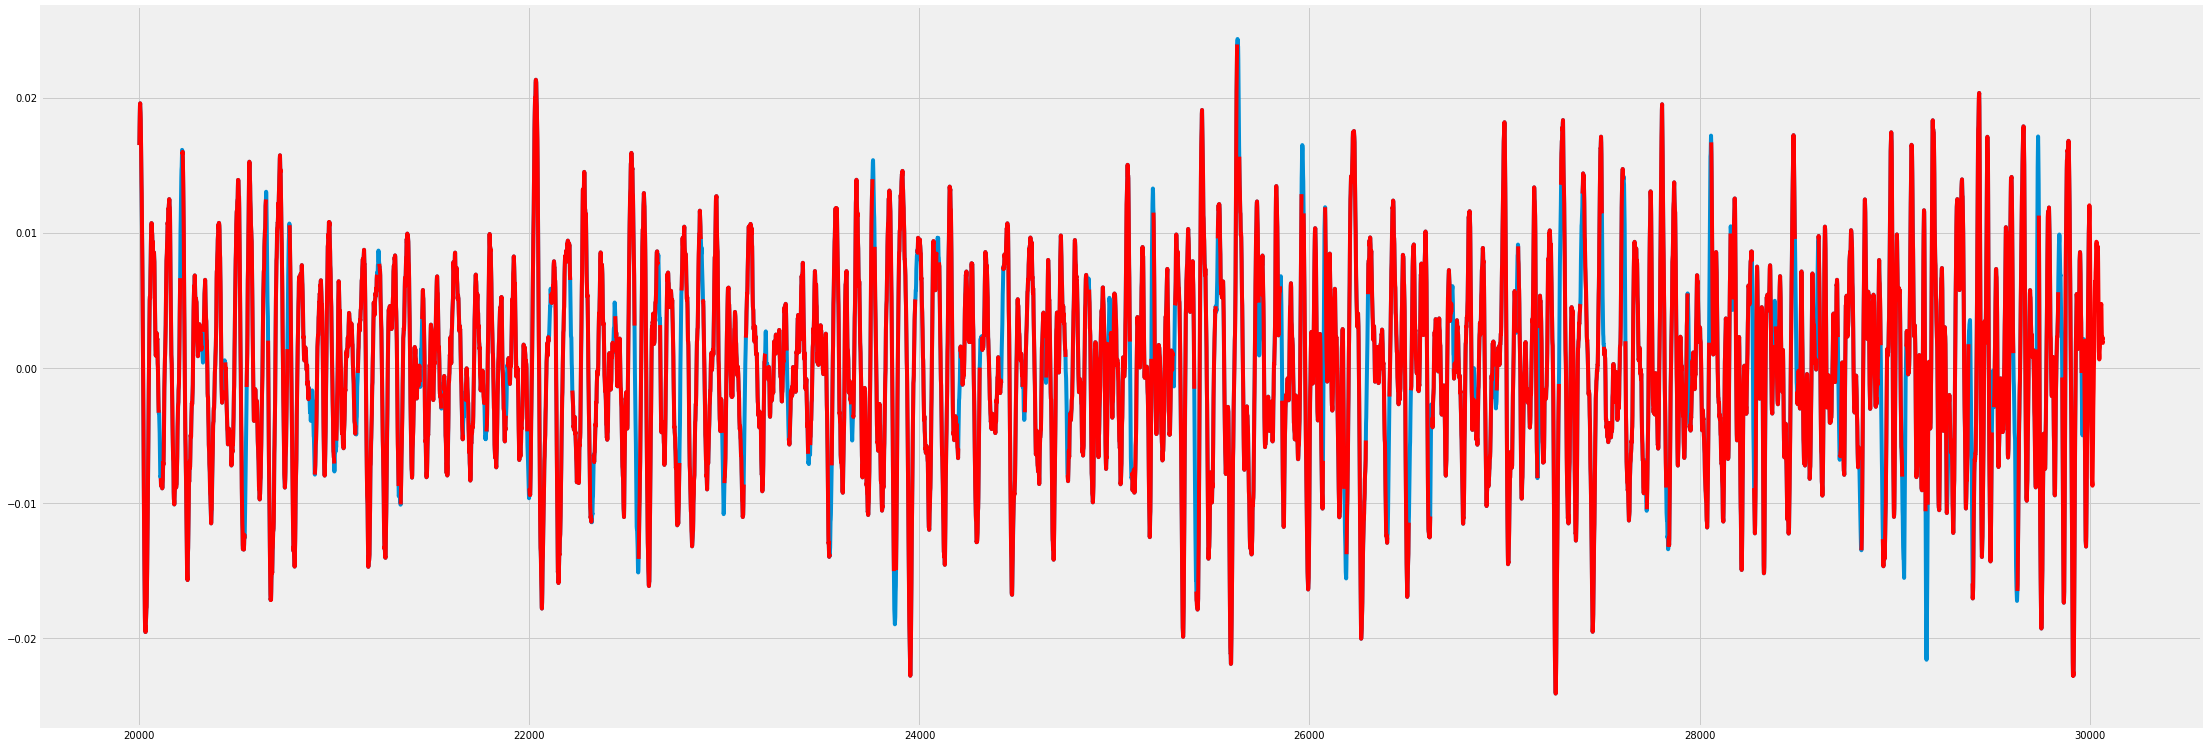

In [53]:
a = 20000
b = 30000
for i in Data_new:
    fig2 = plt.figure(figsize= (30,10))
    axes = fig2.add_axes([0.2,0.1,1,1])
    axes.plot( Data_new[0].Z[a: b])
    k = a
    while( k < b ):
        p = np.array(Data_new[0].Z[k:k+100]).reshape(1,-1)
        p= model.predict(p)
        if( p[0,0] < p[0,1]):
            axes.plot( Data_new[0].Z[k: k+100], c = 'r')
            #axes.scatter(k+50, p[0, 1], marker = "o", c="g", zorder=20 )
            k +=100
        k += 10
        

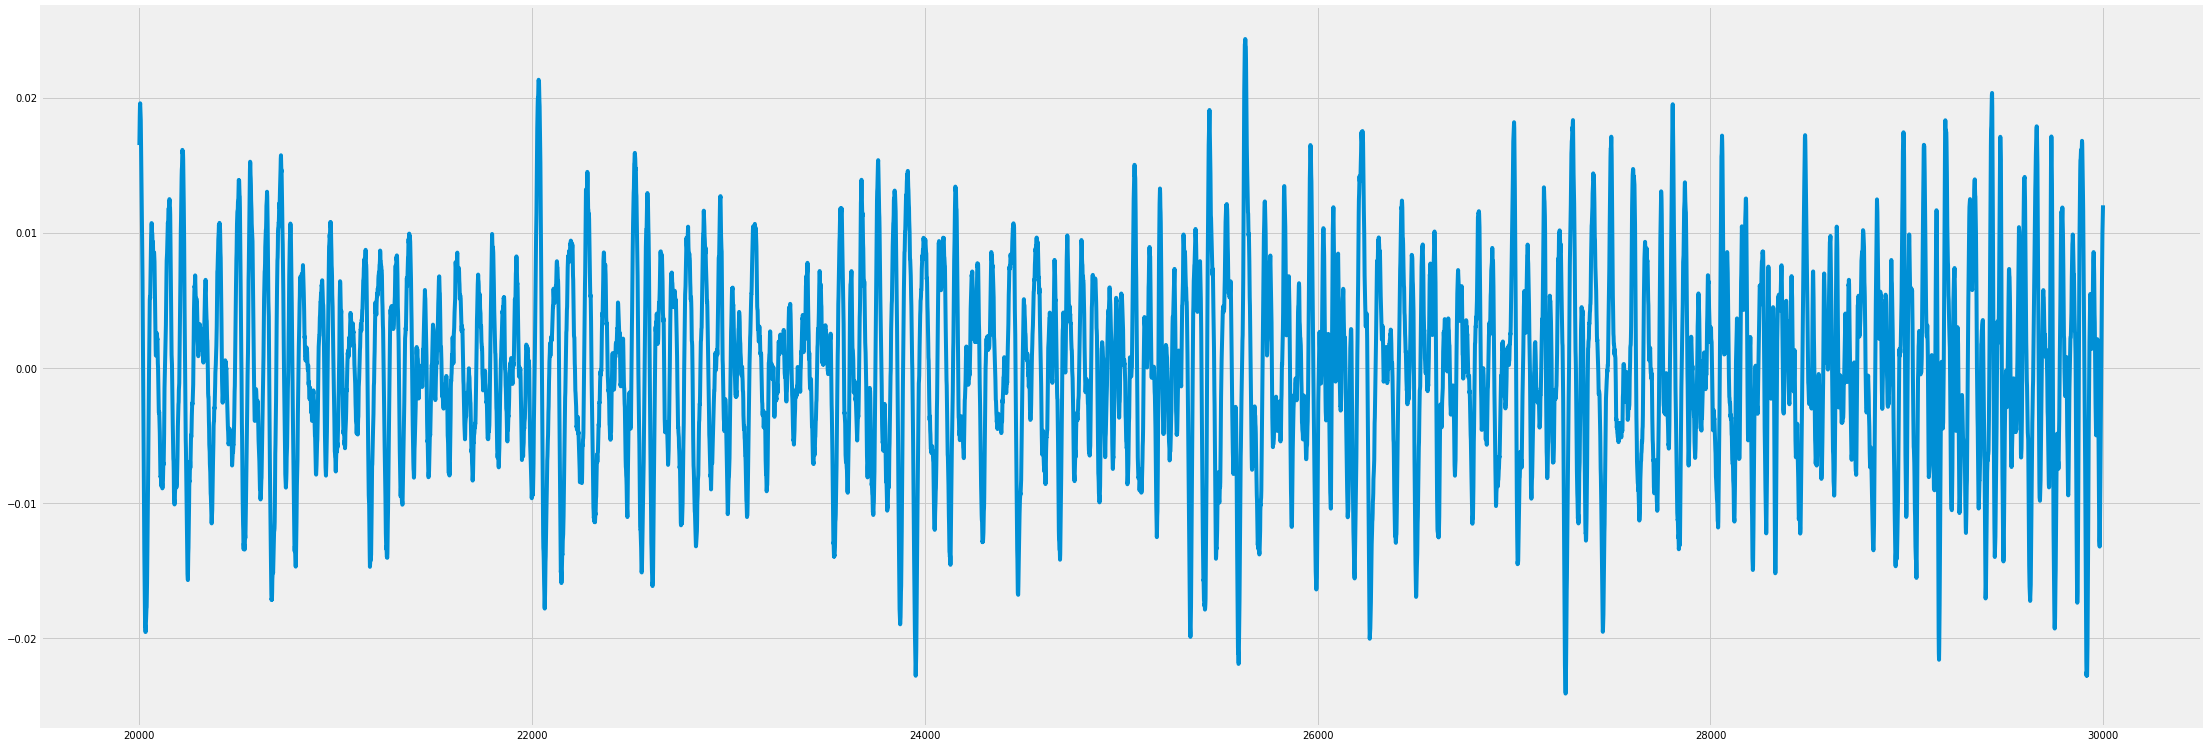

In [54]:
fig2 = plt.figure(figsize= (30,10))
axes = fig2.add_axes([0.2,0.1,1,1])
axes.plot( Data_new[0].Z[20000: 30000])